# Enterprise Data Science Bootcamp Project
### Enterprise Data Science & Analytics 2025

---

### Team Members:
- **Daniel Almeida** (20241154)
- **Gonçalo Dias** (20240819)
- **Miguel Almeida** (20241151)

In [1]:
%run ../utils/configuration.ipynb

In [2]:
import sys
import polars as pl

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

In [4]:
try:
    df = pl.read_parquet(train_path)
except Exception as e:
    print(f"Error: {e}")
    sys.exit(1)


In [5]:
df.columns

['customer_id',
 'referred_a_friend',
 'number_of_referrals',
 'tenure_in_months',
 'offer',
 'phone_service',
 'avg_monthly_long_distance_charges',
 'multiple_lines',
 'internet_service',
 'internet_type',
 'avg_monthly_gb_download',
 'online_security',
 'online_backup',
 'device_protection_plan',
 'premium_tech_support',
 'streaming_tv',
 'streaming_movies',
 'streaming_music',
 'unlimited_data',
 'contract',
 'paperless_billing',
 'payment_method',
 'monthly_charge',
 'total_charges',
 'total_refunds',
 'total_extra_data_charges',
 'total_long_distance_charges',
 'total_revenue',
 'gender',
 'age',
 'under_30',
 'senior_citizen',
 'married',
 'number_of_dependents',
 'city',
 'zip_code',
 'lat_long',
 'latitude',
 'longitude',
 'count',
 'quarter',
 'satisfaction_score',
 'customer_status',
 'churn_label',
 'churn_value',
 'churn_score',
 'cltv',
 'churn_category',
 'churn_reason',
 'population']

<a class="anchor" id="1st-bullet">
# 1. Data Collection and Initial Processing & Exploratory Data Analysis
</a>

In [6]:
df.shape

(5634, 50)

In [7]:
#df.index

In [8]:
df.filter(df.is_duplicated())

customer_id,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,gender,age,under_30,senior_citizen,married,number_of_dependents,city,zip_code,lat_long,latitude,longitude,count,quarter,satisfaction_score,customer_status,churn_label,churn_value,churn_score,cltv,churn_category,churn_reason,population
str,str,i64,i64,str,str,f64,str,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,f64,f64,f64,i64,f64,f64,str,i64,f64,i64,i64,i64,str,i64,str,f64,f64,i64,str,i64,str,str,i64,i64,i64,str,str,i64


In [9]:
df.columns

['customer_id',
 'referred_a_friend',
 'number_of_referrals',
 'tenure_in_months',
 'offer',
 'phone_service',
 'avg_monthly_long_distance_charges',
 'multiple_lines',
 'internet_service',
 'internet_type',
 'avg_monthly_gb_download',
 'online_security',
 'online_backup',
 'device_protection_plan',
 'premium_tech_support',
 'streaming_tv',
 'streaming_movies',
 'streaming_music',
 'unlimited_data',
 'contract',
 'paperless_billing',
 'payment_method',
 'monthly_charge',
 'total_charges',
 'total_refunds',
 'total_extra_data_charges',
 'total_long_distance_charges',
 'total_revenue',
 'gender',
 'age',
 'under_30',
 'senior_citizen',
 'married',
 'number_of_dependents',
 'city',
 'zip_code',
 'lat_long',
 'latitude',
 'longitude',
 'count',
 'quarter',
 'satisfaction_score',
 'customer_status',
 'churn_label',
 'churn_value',
 'churn_score',
 'cltv',
 'churn_category',
 'churn_reason',
 'population']

In [10]:
df.describe()

statistic,customer_id,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,gender,age,under_30,senior_citizen,married,number_of_dependents,city,zip_code,lat_long,latitude,longitude,count,quarter,satisfaction_score,customer_status,churn_label,churn_value,churn_score,cltv,churn_category,churn_reason,population
str,str,str,f64,f64,str,str,f64,str,str,str,f64,str,str,str,str,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,str,f64,str,f64,f64,f64,str,f64,str,str,f64,f64,f64,str,str,f64
"""count""","""5634""","""5634""",5634.0,5634.0,"""5634""","""5634""",5634.0,"""5634""","""5634""","""5634""",5634.0,"""5634""","""5634""","""5634""","""5634""","""5634""","""5634""","""5634""","""5634""","""5634""","""5634""","""5634""",5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,"""5634""",5634.0,0.0,5634.0,5634.0,5634.0,"""5634""",5634.0,"""5634""",5634.0,5634.0,5634.0,"""5634""",5634.0,"""5634""","""5634""",5634.0,5634.0,5634.0,"""5634""","""5634""",5634.0
"""null_count""","""0""","""0""",0.0,0.0,"""0""","""0""",0.0,"""0""","""0""","""0""",0.0,"""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,"""0""",0.0,5634.0,0.0,0.0,0.0,"""0""",0.0,"""0""",0.0,0.0,0.0,"""0""",0.0,"""0""","""0""",0.0,0.0,0.0,"""0""","""0""",0.0
"""mean""",null,null,1.944444,32.395101,null,null,22.825156,null,null,null,20.581292,null,null,null,null,null,null,null,null,null,null,null,64.652467,2276.59598,1.911642,7.160099,743.980431,3025.824869,null,46.443379,null,0.162762,0.483671,0.465566,null,93482.620341,null,36.17276,-119.732273,1.0,null,3.242989,null,null,0.267128,58.477813,4401.71956,null,null,22109.728257
"""std""",null,null,2.995695,24.586538,null,null,15.473511,null,null,null,20.501303,null,null,null,null,null,null,null,null,null,null,null,30.050923,2264.943292,7.788946,25.599025,845.460243,2863.994841,null,16.725966,null,0.369181,0.499778,0.962811,null,1847.179929,null,2.456951,2.147808,0.0,null,1.204638,null,null,0.442499,21.136306,1182.542675,null,null,21075.903596
"""min""","""0003-MKNFE""","""No""",0.0,1.0,"""None""","""No""",0.0,"""No""","""No""","""Cable""",0.0,"""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""Month-to-Month""","""No""","""Bank Withdrawal""",18.4,18.8,0.0,0.0,0.0,21.36,"""Female""",19.0,null,0.0,0.0,0.0,"""Acampo""",90001.0,"""32.555828, -117.040073""",32.555828,-124.301372,1.0,"""Q3""",1.0,"""Churned""","""No""",0.0,5.0,2003.0,"""Attitude""","""Attitude of service provider""",11.0
"""25%""",null,null,0.0,9.0,null,null,9.13,null,null,null,3.0,null,null,null,null,null,null,null,null,null,null,null,35.7,392.65,0.0,0.0,65.72,597.85,null,32.0,null,0.0,0.0,0.0,null,92107.0,null,33.977468,-121.74841,1.0,null,3.0,null,null,0.0,41.0,3469.0,null,null,2379.0
"""50%""",null,null,0.0,29.0,null,null,22.78,null,null,null,17.0,null,null,null,null,null,null,null,null,null,null,null,70.25,1396.0,0.0,0.0,398.79,2095.9,null,46.0,null,0.0,0.0,0.0,null,93512.0,null,36.141319,-119.505661,1.0,null,3.0,null,null,0.0,61.0,4531.0,null,null,17554.0
"""75%""",null,null,3.0,56.0,null,null,36.33,null,null,null,27.0,null,null,null,null,null,null,null,null,null,null,null,89.85,3770.0,0.0,0.0,1177.8,4779.37,null,60.0,null,0.0,1.0,0.0,null,95322.0,null,38.140719,-117.952151,1.0,null,4.0,null,null,1.0,75.0,5387.0,null,null,35790.0
"""max""","""9993-LHIEB""","""Yes""",11.0,72.0,"""Offer E""","""Yes""",49.99,"""Yes""","""Yes""","""None""",85.0,"""Yes""","""Yes""","""Yes""","""Yes""","""Yes""","""Yes""","""Yes""","""Yes""","""Two Year""","""Yes""","""Mailed Check""",1

In [11]:
df.schema

Schema([('customer_id', String),
        ('referred_a_friend', String),
        ('number_of_referrals', Int64),
        ('tenure_in_months', Int64),
        ('offer', String),
        ('phone_service', String),
        ('avg_monthly_long_distance_charges', Float64),
        ('multiple_lines', String),
        ('internet_service', String),
        ('internet_type', String),
        ('avg_monthly_gb_download', Int64),
        ('online_security', String),
        ('online_backup', String),
        ('device_protection_plan', String),
        ('premium_tech_support', String),
        ('streaming_tv', String),
        ('streaming_movies', String),
        ('streaming_music', String),
        ('unlimited_data', String),
        ('contract', String),
        ('paperless_billing', String),
        ('payment_method', String),
        ('monthly_charge', Float64),
        ('total_charges', Float64),
        ('total_refunds', Float64),
        ('total_extra_data_charges', Int64),
        ('total_lo

In [12]:
df.null_count()

customer_id,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,gender,age,under_30,senior_citizen,married,number_of_dependents,city,zip_code,lat_long,latitude,longitude,count,quarter,satisfaction_score,customer_status,churn_label,churn_value,churn_score,cltv,churn_category,churn_reason,population
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5634,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
df.select(pl.all().n_unique())

customer_id,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,gender,age,under_30,senior_citizen,married,number_of_dependents,city,zip_code,lat_long,latitude,longitude,count,quarter,satisfaction_score,customer_status,churn_label,churn_value,churn_score,cltv,churn_category,churn_reason,population
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
5634,2,12,72,6,2,3167,2,2,4,50,2,2,2,2,2,2,2,2,3,2,3,1498,5293,395,16,4921,5599,2,62,1,2,2,10,1103,1623,1665,1623,1622,1,1,5,3,2,2,81,3100,6,21,1566


In [14]:
for col in df.columns:
    print(f"Coluna: {col}")
    print(df.select(col).unique())
    print()

Coluna: customer_id
shape: (5_634, 1)
┌─────────────┐
│ customer_id │
│ ---         │
│ str         │
╞═════════════╡
│ 6502-MJQAE  │
│ 4192-GORJT  │
│ 7868-BGSZA  │
│ 6402-SSEJG  │
│ 6581-NQCBA  │
│ …           │
│ 6048-UWKAL  │
│ 7298-IZWLY  │
│ 8076-FEZKJ  │
│ 4213-HKBJO  │
│ 9351-HXDMR  │
└─────────────┘

Coluna: referred_a_friend
shape: (2, 1)
┌───────────────────┐
│ referred_a_friend │
│ ---               │
│ str               │
╞═══════════════════╡
│ No                │
│ Yes               │
└───────────────────┘

Coluna: number_of_referrals
shape: (12, 1)
┌─────────────────────┐
│ number_of_referrals │
│ ---                 │
│ i64                 │
╞═════════════════════╡
│ 6                   │
│ 0                   │
│ 3                   │
│ 9                   │
│ 1                   │
│ …                   │
│ 4                   │
│ 5                   │
│ 2                   │
│ 8                   │
│ 11                  │
└─────────────────────┘

Coluna: tenure_in_mo

In [15]:
df.select(pl.col(pl.NUMERIC_DTYPES)).describe()

C:\Users\Danie\AppData\Local\Temp\ipykernel_22524\3086008548.py:1: DeprecationWarning: `NUMERIC_DTYPES` was deprecated in version 1.0.0. Define your own data type groups or use the `polars.selectors` module for selecting columns of a certain data type.
  df.select(pl.col(pl.NUMERIC_DTYPES)).describe()


statistic,number_of_referrals,tenure_in_months,avg_monthly_long_distance_charges,avg_monthly_gb_download,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,age,under_30,senior_citizen,married,number_of_dependents,zip_code,latitude,longitude,count,satisfaction_score,churn_value,churn_score,cltv,population
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,0.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5634.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",1.944444,32.395101,22.825156,20.581292,64.652467,2276.59598,1.911642,7.160099,743.980431,3025.824869,46.443379,null,0.162762,0.483671,0.465566,93482.620341,36.17276,-119.732273,1.0,3.242989,0.267128,58.477813,4401.71956,22109.728257
"""std""",2.995695,24.586538,15.473511,20.501303,30.050923,2264.943292,7.788946,25.599025,845.460243,2863.994841,16.725966,null,0.369181,0.499778,0.962811,1847.179929,2.456951,2.147808,0.0,1.204638,0.442499,21.136306,1182.542675,21075.903596
"""min""",0.0,1.0,0.0,0.0,18.4,18.8,0.0,0.0,0.0,21.36,19.0,null,0.0,0.0,0.0,90001.0,32.555828,-124.301372,1.0,1.0,0.0,5.0,2003.0,11.0
"""25%""",0.0,9.0,9.13,3.0,35.7,392.65,0.0,0.0,65.72,597.85,32.0,null,0.0,0.0,0.0,92107.0,33.977468,-121.74841,1.0,3.0,0.0,41.0,3469.0,2379.0
"""50%""",0.0,29.0,22.78,17.0,70.25,1396.0,0.0,0.0,398.79,2095.9,46.0,null,0.0,0.0,0.0,93512.0,36.141319,-119.505661,1.0,3.0,0.0,61.0,4531.0,17554.0
"""75%""",3.0,56.0,36.33,27.0,89.85,3770.0,0.0,0.0,1177.8,4779.37,60.0,null,0.0,1.0,0.0,95322.0,38.140719,-117.952151,1.0,4.0,1.0,75.0,5387.0,35790.0
"""max""",11.0,72.0,49.99,85.0,118.75,8684.8,49.79,150.0,3564.72,11868.34,80.0,null,1.0,1.0,9.0,96150.0,41.962127,-114.192901,1.0,5.0,1.0,96.0,6499.0,105285.0


In [16]:
df_numerical_variables = df.select(pl.col(pl.NUMERIC_DTYPES))

C:\Users\Danie\AppData\Local\Temp\ipykernel_22524\4039034894.py:1: DeprecationWarning: `NUMERIC_DTYPES` was deprecated in version 1.0.0. Define your own data type groups or use the `polars.selectors` module for selecting columns of a certain data type.
  df_numerical_variables = df.select(pl.col(pl.NUMERIC_DTYPES))


In [17]:
df_numerical_variables.columns

['number_of_referrals',
 'tenure_in_months',
 'avg_monthly_long_distance_charges',
 'avg_monthly_gb_download',
 'monthly_charge',
 'total_charges',
 'total_refunds',
 'total_extra_data_charges',
 'total_long_distance_charges',
 'total_revenue',
 'age',
 'under_30',
 'senior_citizen',
 'married',
 'number_of_dependents',
 'zip_code',
 'latitude',
 'longitude',
 'count',
 'satisfaction_score',
 'churn_value',
 'churn_score',
 'cltv',
 'population']

In [18]:
df_numerical_variables = df_numerical_variables.drop(['under_30']) if 'under_30' in df_numerical_variables.columns else df_numerical_variables


In [19]:
df_numerical_variables

number_of_referrals,tenure_in_months,avg_monthly_long_distance_charges,avg_monthly_gb_download,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,age,senior_citizen,married,number_of_dependents,zip_code,latitude,longitude,count,satisfaction_score,churn_value,churn_score,cltv,population
i64,i64,f64,i64,f64,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,f64,f64,i64,i64,i64,i64,i64,i64
0,39,0.0,6,50.65,1905.4,3.51,0,0.0,1901.89,56,0,0,0,95818,38.556306,-121.495817,1,4,0,31,5433,21313
0,8,29.66,12,95.65,778.1,0.0,0,237.28,1015.38,53,0,0,0,92201,33.713891,-116.237257,1,3,1,95,5335,56307
0,48,30.82,0,24.0,1183.05,0.0,0,1479.36,2662.41,54,0,0,0,93063,34.296813,-118.685703,1,3,0,66,3948,49027
0,7,2.24,22,59.5,415.95,0.0,0,15.68,431.63,54,0,0,0,96051,40.883853,-122.418258,1,3,1,91,4661,1236
0,15,0.0,23,38.8,603.0,0.0,0,0.0,603.0,49,0,0,0,91406,34.195685,-118.490752,1,4,0,55,2118,50047
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
0,8,45.04,73,64.1,504.05,0.0,10,360.32,874.37,19,0,0,0,95941,39.531028,-121.24807,1,5,0,25,2804,452
1,1,32.35,18,89.15,89.15,0.0,0,32.35,121.5,44,0,1,0,95606,38.809804,-122.241383,1,1,1,68,3123,382
1,8,16.88,6,101.15,842.9,0.0,0,135.04,977.94,47,0,1,0,92109,32.787836,-117.232376,1,2,1,76,2750,46086


C:\Users\Danie\AppData\Local\Temp\ipykernel_22524\1736945150.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1) = plt.subplots(1,1, figsize = (14,6))


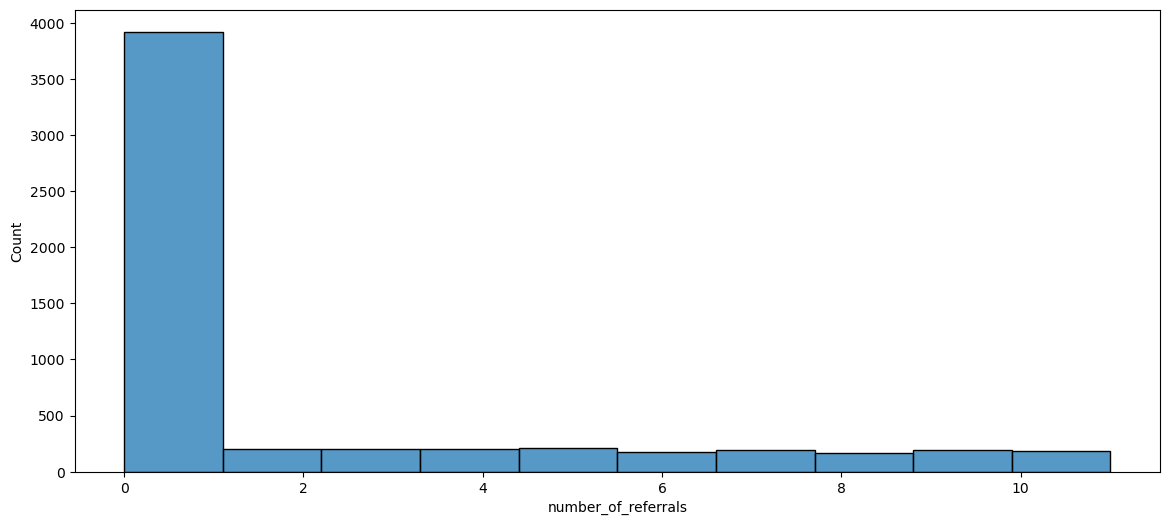

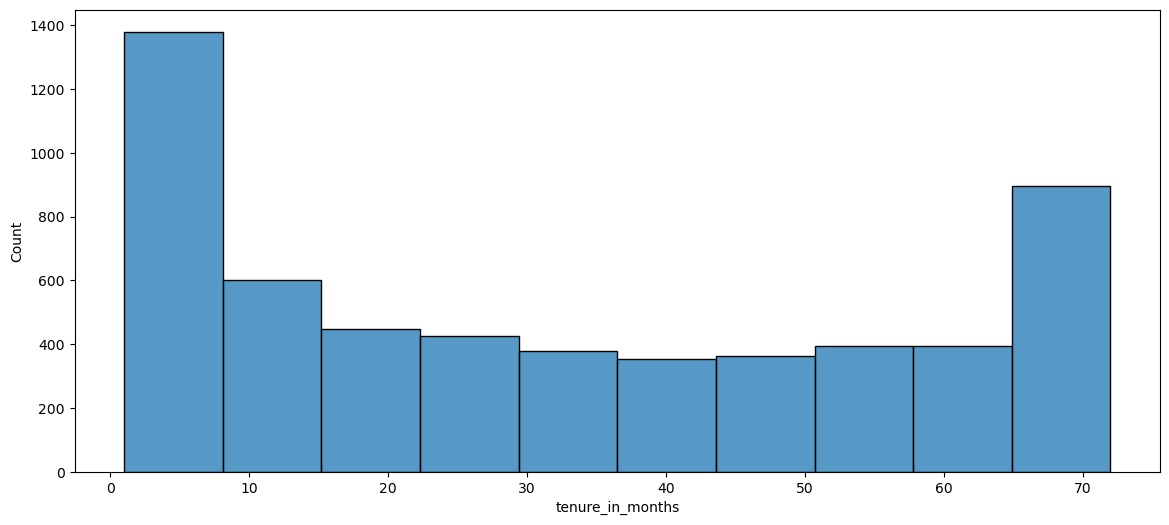

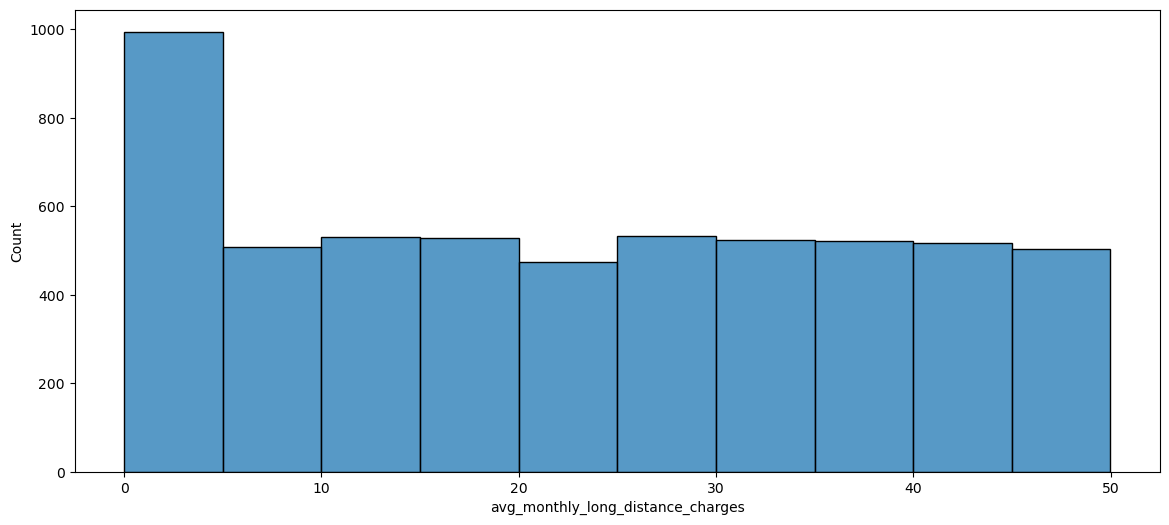

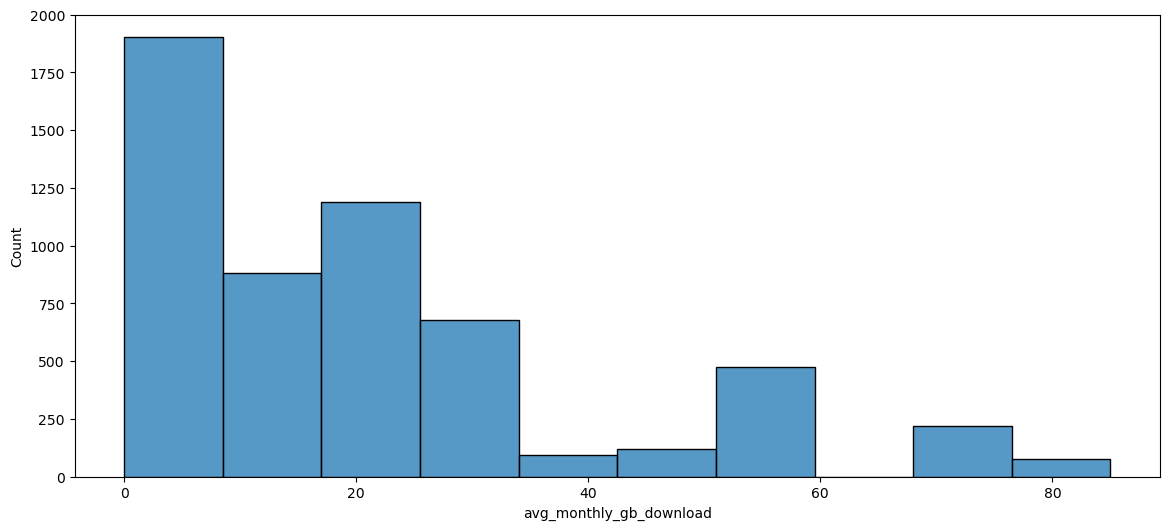

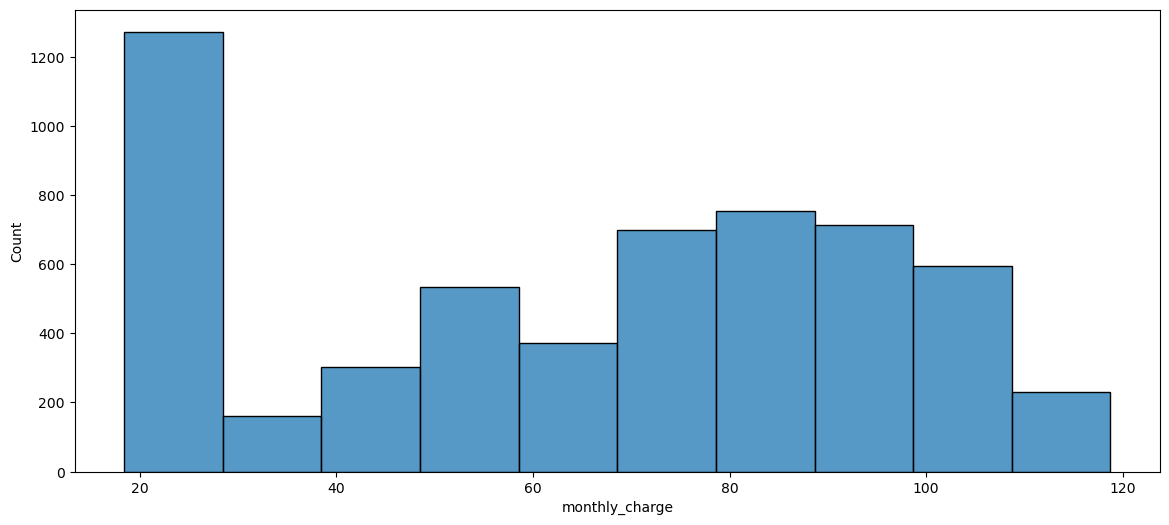

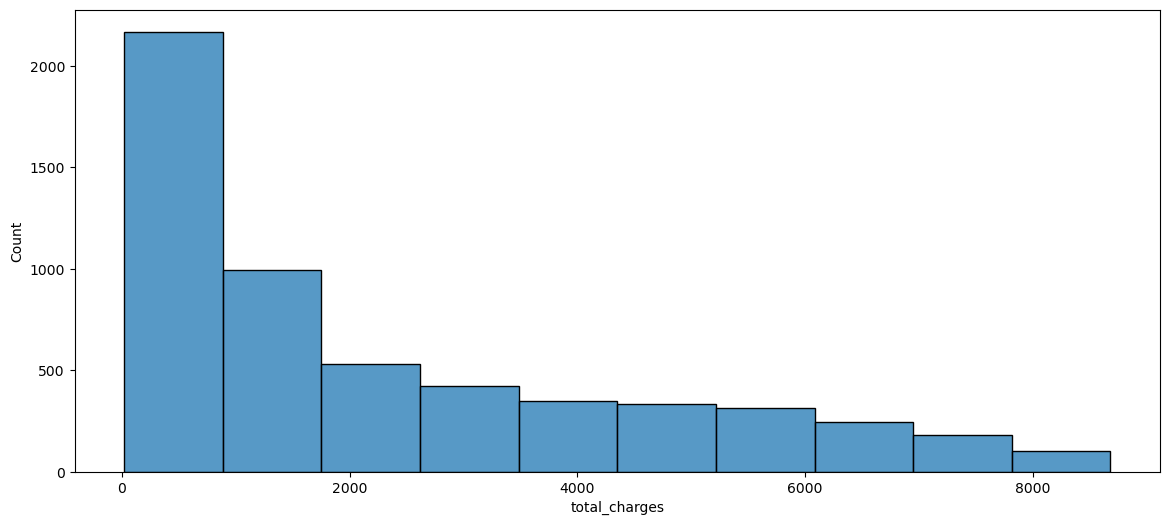

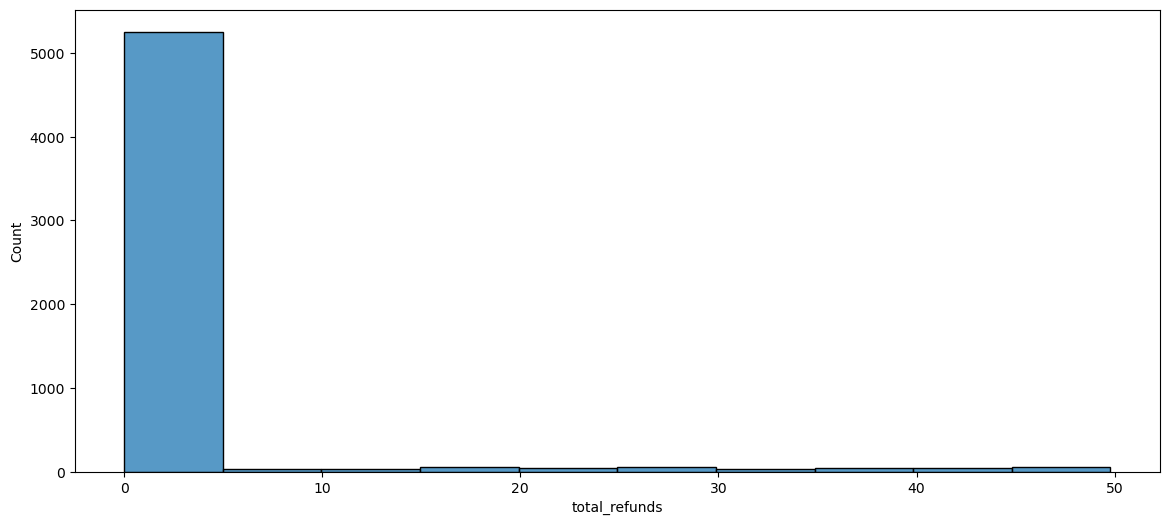

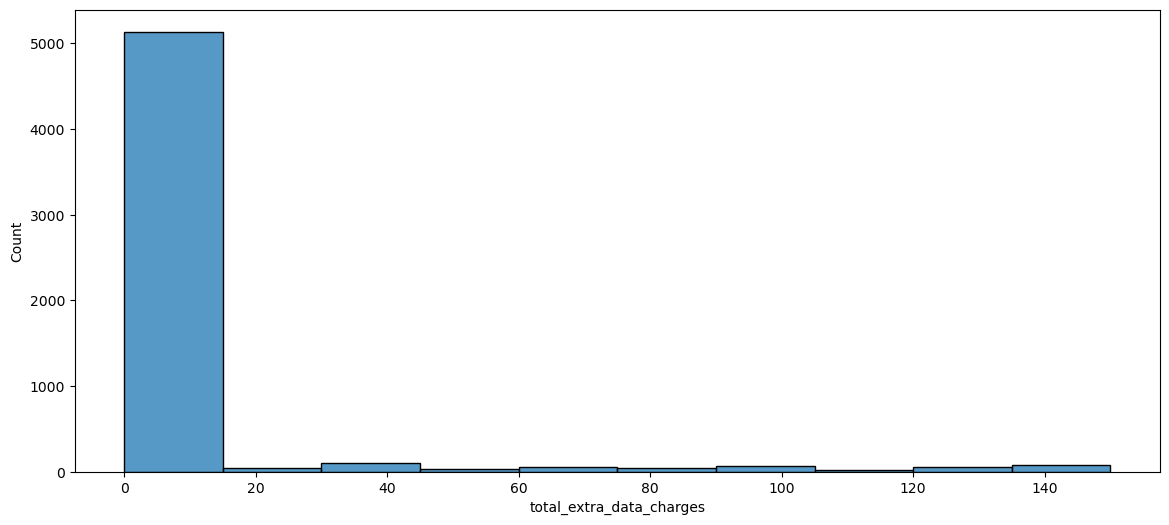

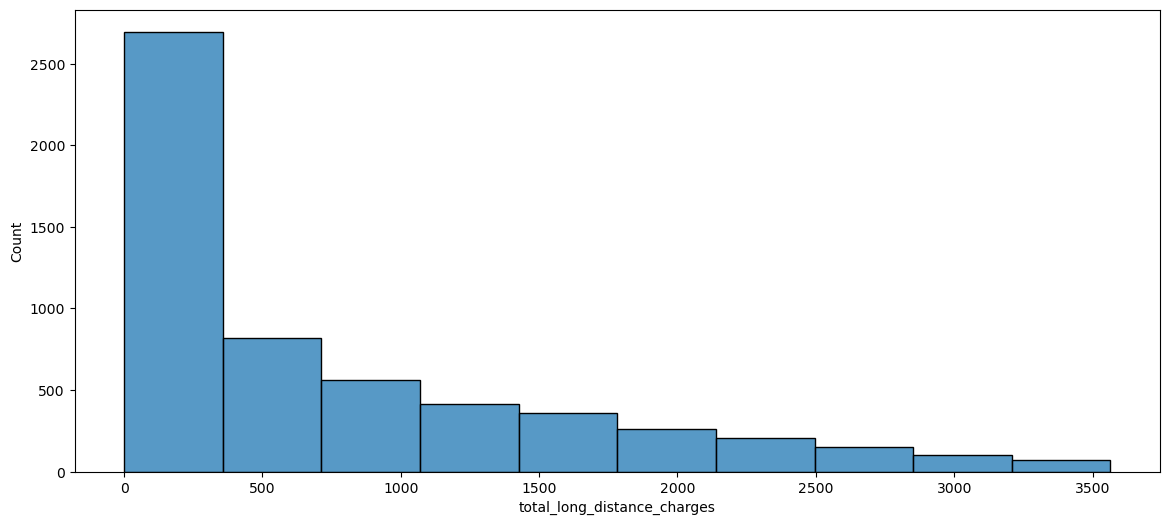

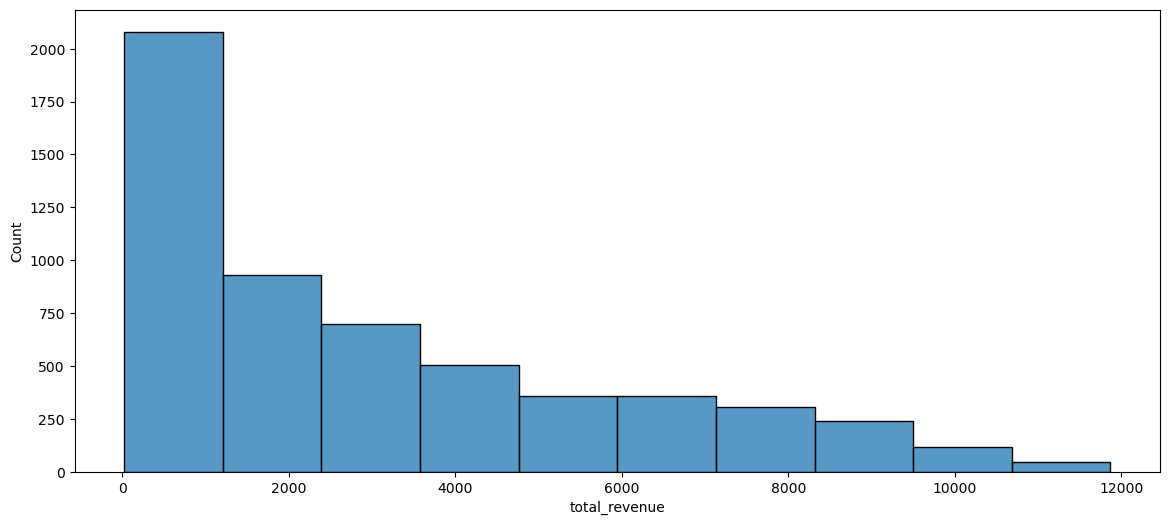

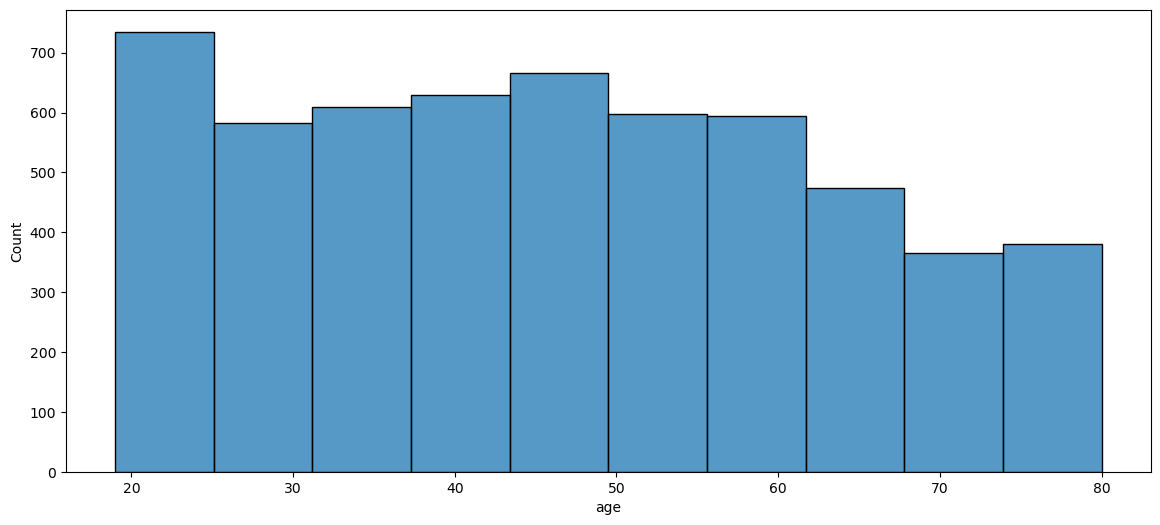

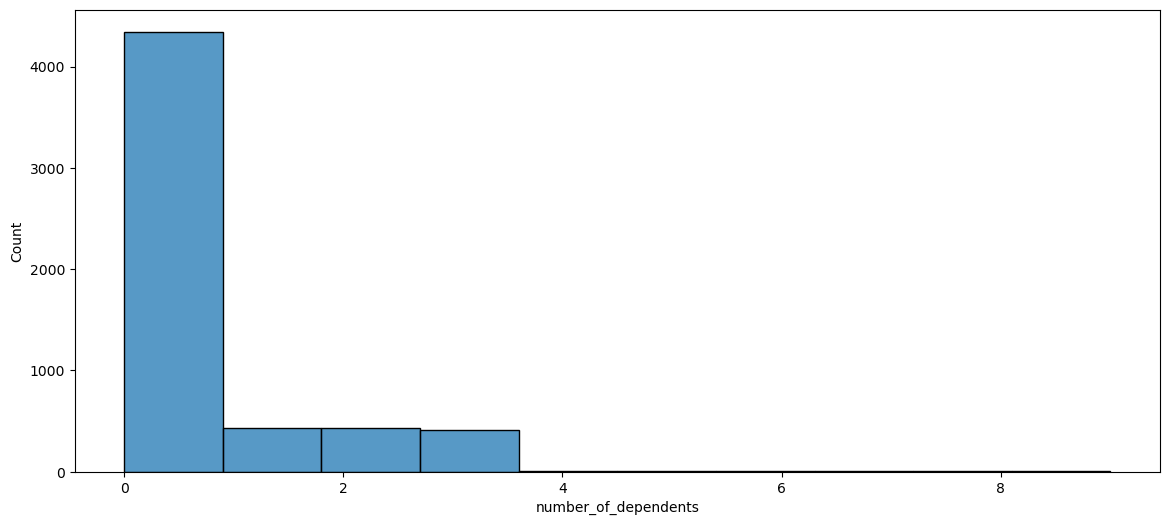

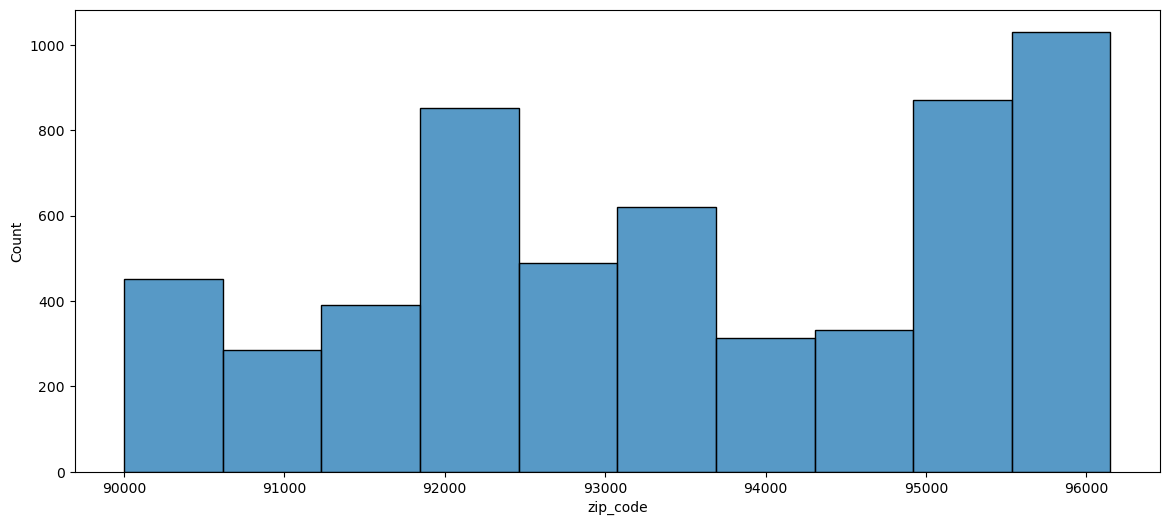

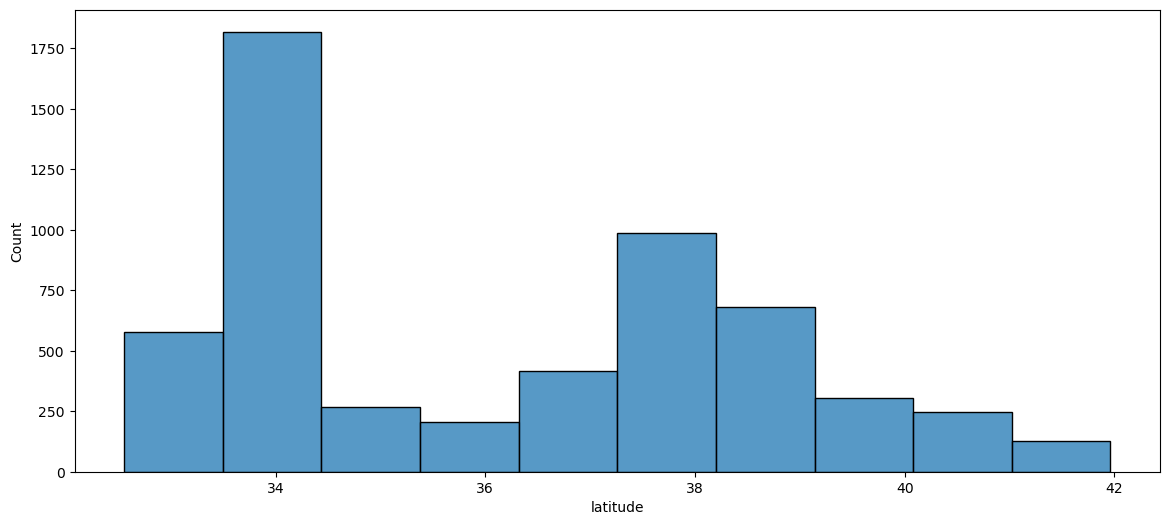

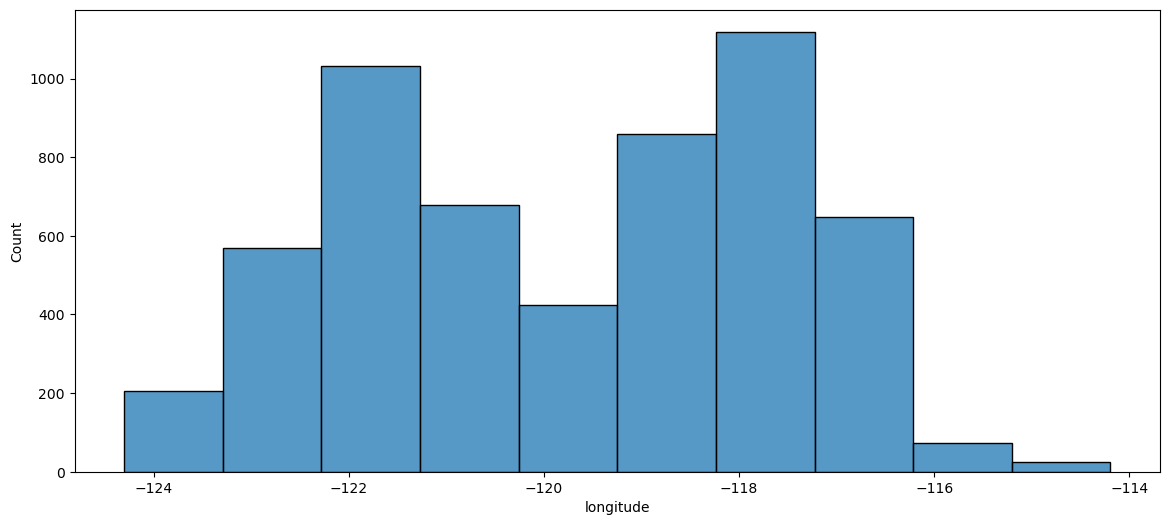

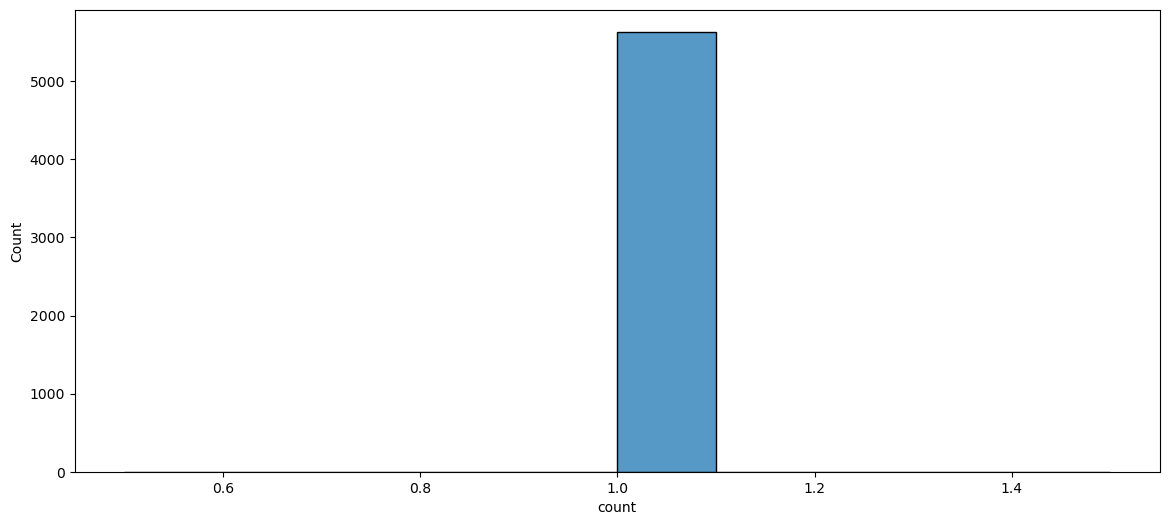

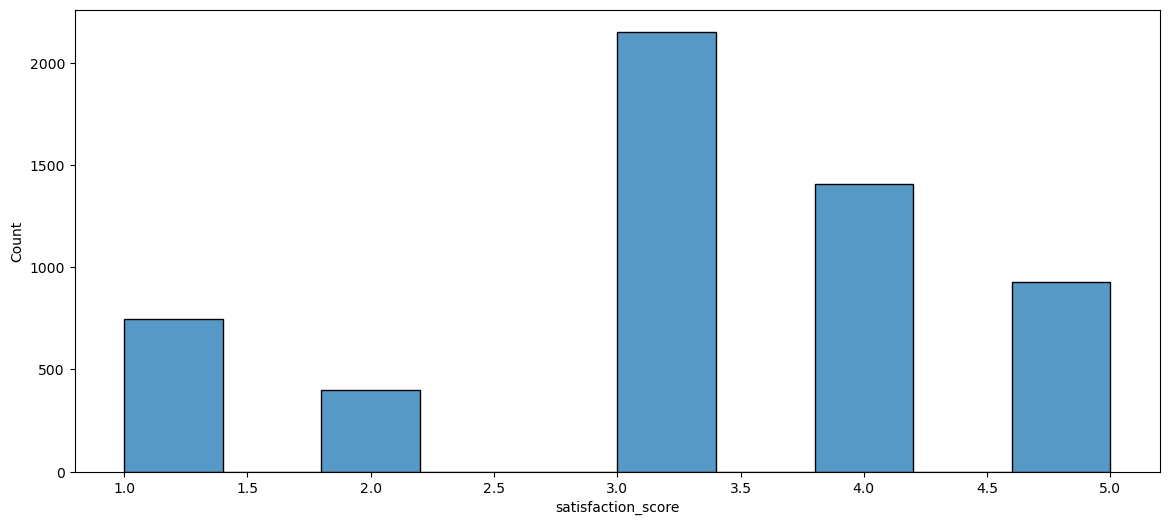

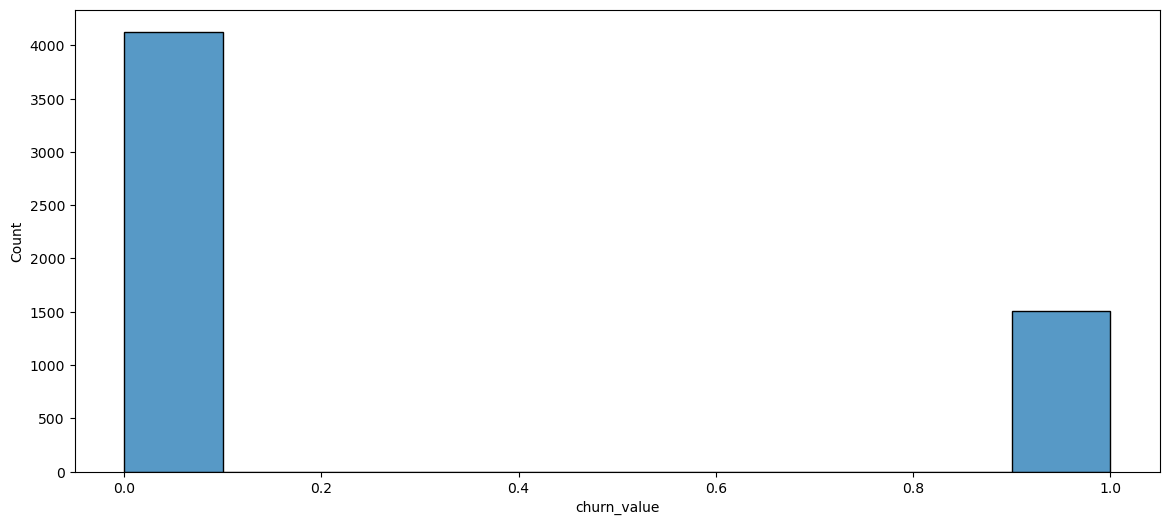

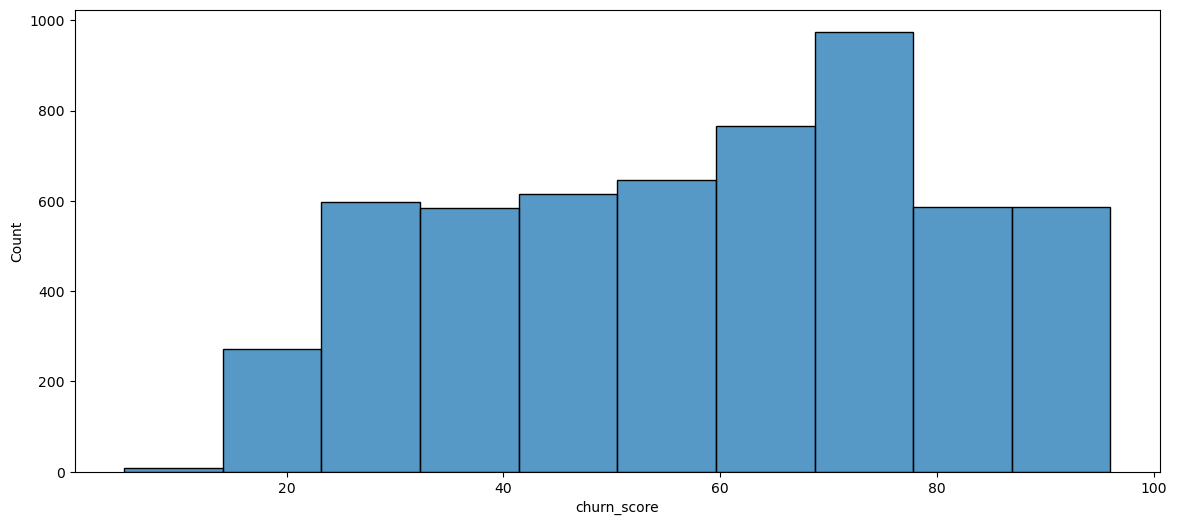

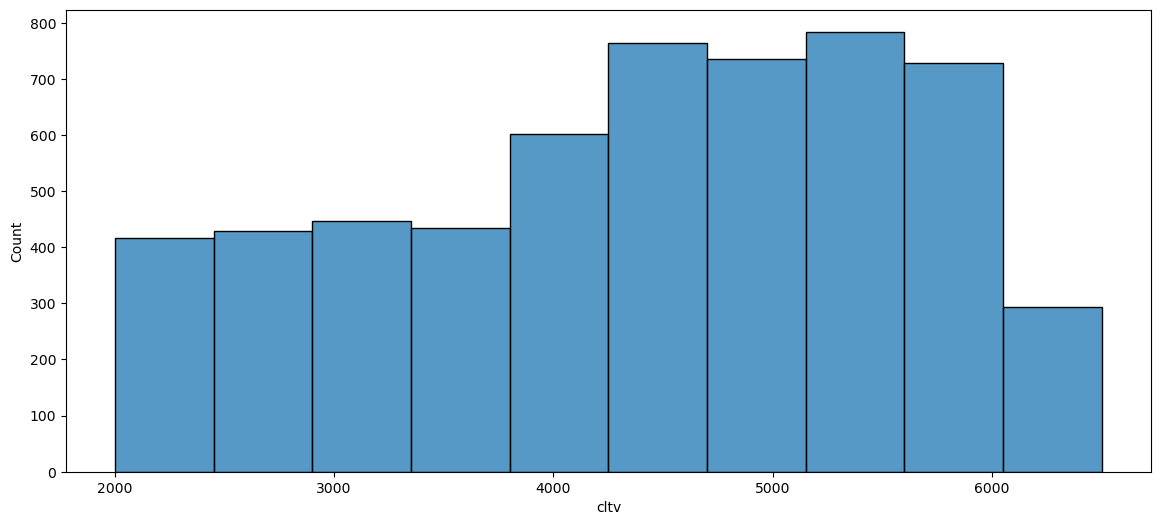

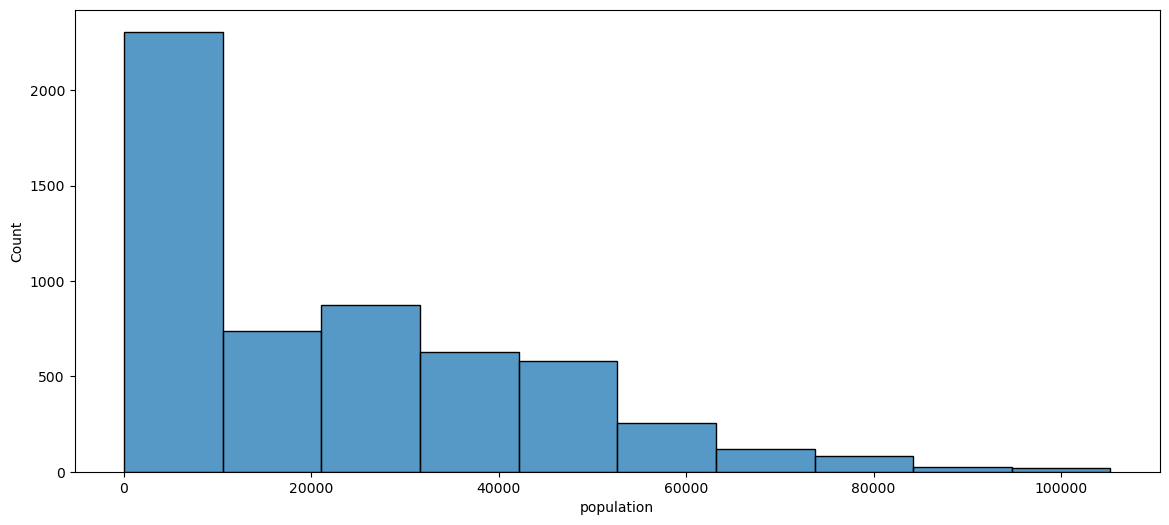

In [20]:
bivalue_columns_x = [
    'referred_a_friend'
    ,'phone_service'
    ,'multiple_lines'
    ,'internet_service'
    ,'online_security'
    ,'online_backup'
    ,'device_protection_plan'
    ,'premium_tech_support'
    ,'streaming_tv'
    ,'streaming_movies'
    ,'streaming_music'
    ,'unlimited_data'
    ,'paperless_billing'
    ,'gender'
    ,'churn_label'
    ,'senior_citizen'
    ,'married'
]
for col in df_numerical_variables.columns:
    if col in bivalue_columns_x:
        continue
    fig, (ax1) = plt.subplots(1,1, figsize = (14,6)) 
    sns.histplot(ax = ax1, data = df_numerical_variables.to_pandas(), x = col, bins = 10) #df_numerical_variables.to_pandas



In [21]:
for col in df_numerical_variables.columns:
    if col in bivalue_columns_x:
        continue
    print(f"Coluna: {col}")

Coluna: number_of_referrals
Coluna: tenure_in_months
Coluna: avg_monthly_long_distance_charges
Coluna: avg_monthly_gb_download
Coluna: monthly_charge
Coluna: total_charges
Coluna: total_refunds
Coluna: total_extra_data_charges
Coluna: total_long_distance_charges
Coluna: total_revenue
Coluna: age
Coluna: number_of_dependents
Coluna: zip_code
Coluna: latitude
Coluna: longitude
Coluna: count
Coluna: satisfaction_score
Coluna: churn_value
Coluna: churn_score
Coluna: cltv
Coluna: population


Correlation between Numerical Variables

<Axes: >

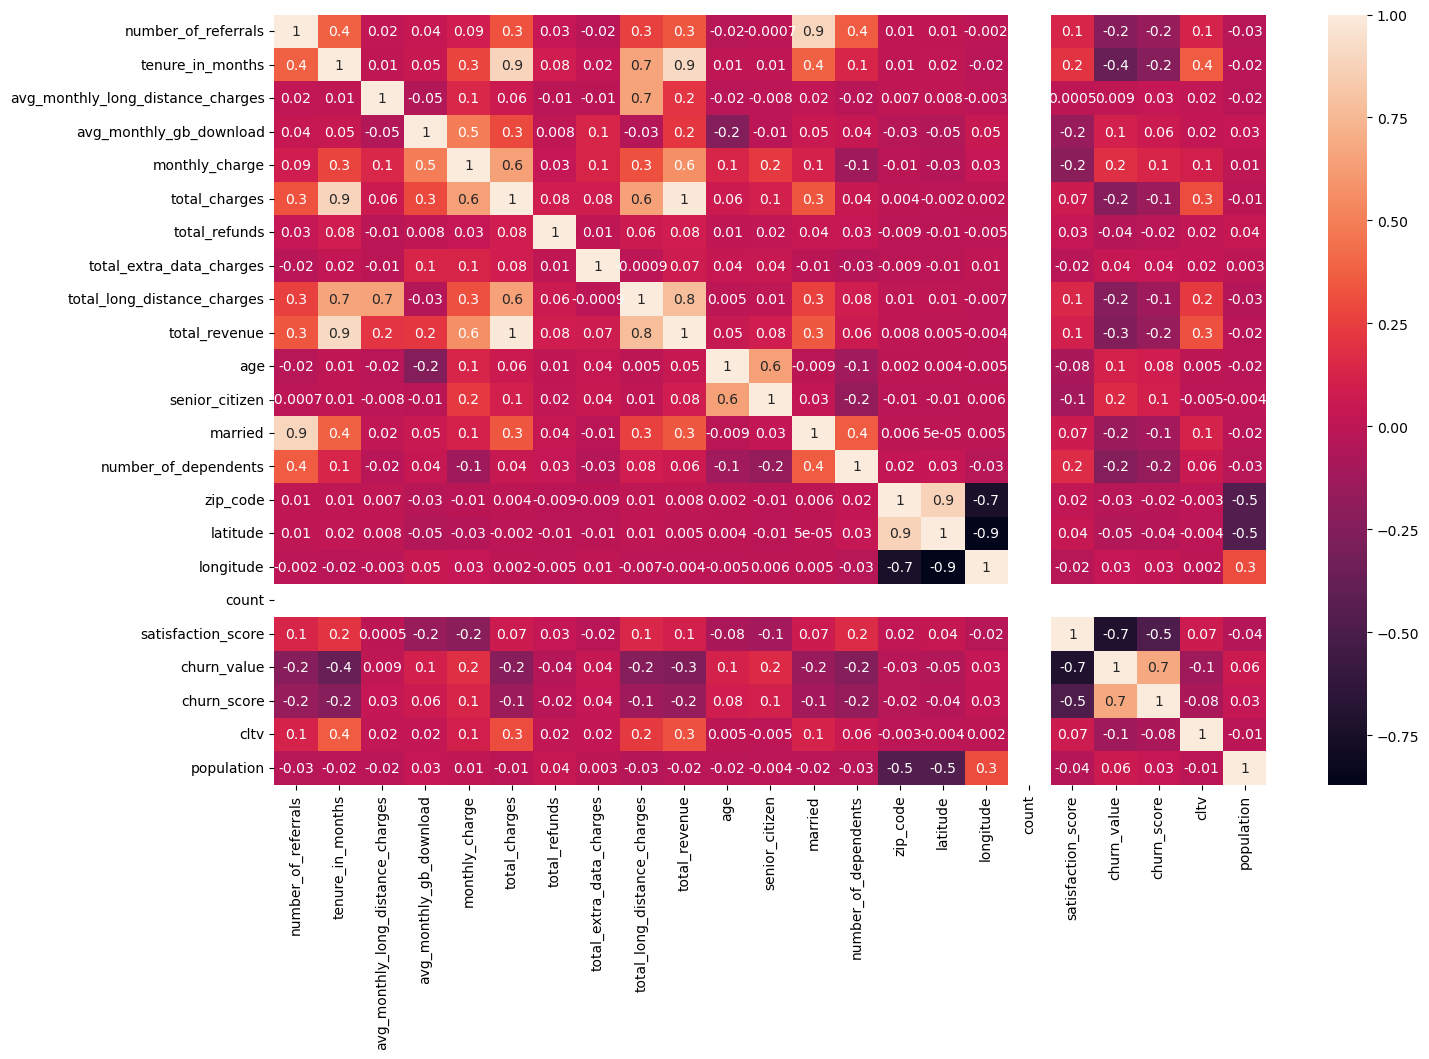

In [22]:
# calculate correlation matrix (convert to pandas for spearman correlation)
from scipy.stats import spearmanr
df_corr = df_numerical_variables.to_pandas().corr(method='spearman')

# plot the correlation matrix
plt.figure(figsize=(16,10))
sns.heatmap(df_corr, annot=True, fmt = '.1g')

In [23]:
df_corr

,number_of_referrals,tenure_in_months,avg_monthly_long_distance_charges,avg_monthly_gb_download,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,...,number_of_dependents,zip_code,latitude,longitude,count,satisfaction_score,churn_value,churn_score,cltv,population
number_of_referrals,1.000000,0.377791,0.018533,0.042982,0.085296,0.325753,0.034812,-0.020099,0.258678,0.338243,...,0.358631,0.009955,0.011851,-0.001521,NaN,0.133671,-0.231672,-0.161914,0.122220,-0.026290
tenure_in_months,0.377791,1.000000,0.011569,0.050022,0.274237,0.890146,0.084729,0.024584,0.658779,0.912166,...,0.134803,0.013840,0.019821,-0.020897,NaN,0.201150,-0.369262,-0.241580,0.358124,-0.019636
avg_monthly_long_distance_charges,0.018533,0.011569,1.000000,-0.050692,0.144299,0.058944,-0.011205,-0.014265,0.654476,0.209988,...,-0.017843,0.006902,0.008127,-0.003201,NaN,0.000526,0.008946,0.030483,0.020284,-0.020482
avg_monthly_gb_download,0.042982,0.050022,-0.050692,1.000000,0.493910,0.289744,0.007572,0.132182,-0.031483,0.212309,...,0.037849,-0.026986,-0.046952,0.046206,NaN,-0.156255,0.108508,0.064913,0.023201,0.031484
monthly_charge,0.085296,0.274237,0.144299,0.493910,1.000000,0.636727,0.029709,0.130012,0.319083,0.568974,...,-0.131499,-0.014580,-0.034867,0.031022,NaN,-0.221135,0.187629,0.136404,0.099556,0.012981
total_charges,0.325753,0.890146,0.058944,0.289744,0.636727,1.000000,0.082842,0.083759,0.648640,0.978475,...,0.044300,0.003893,-0.001698,0.001532,NaN,0.069364,-0.230202,-0.143968,0.301710,-0.009860
total_refunds,0.034812,0.084729,-0.011205,0.007572,0.029709,0.082842,1.000000,0.011900,0.063056,0.080173,...,0.031092,-0.009430,-0.013244,-0.004648,NaN,0.030662,-0.042080,-0.016188,0.019227,0.037106
total_extra_data_charges,-0.020099,0.024584,-0.014265,0.132182,0.130012,0.083759,0.011900,1.000000,-0.000921,0.073303,...,-0.032292,-0.009393,-0.010426,0.009917,NaN,-0.019657,0.041817,0.035764,0.023234,0.003042
total_long_distance_charges,0.258678,0.658779,0.654476,-0.031483,0.319083,0.648640,0.063056,-0.000921,1.000000,0.775593,...,0.082212,0.012171,0.011349,-0.006960,NaN,0.140655,-0.236770,-0.133259,0.232110,-0.031051
total_revenue,0.338243,0.912166,0.209988,0.212309,0.568974,0.978475,0.080173,0.073303,0.775593,1.000000,...,0.064134,0.008355,0.004677,-0.004132,NaN,0.104906,-0.262387,-0.161385,0.314576,-0.017434


In [24]:
for col in df_numerical_variables.columns:
    print(f"Coluna: {col}")
    print(df.select(col).unique())
    print()

Coluna: number_of_referrals
shape: (12, 1)
┌─────────────────────┐
│ number_of_referrals │
│ ---                 │
│ i64                 │
╞═════════════════════╡
│ 0                   │
│ 6                   │
│ 3                   │
│ 9                   │
│ 7                   │
│ …                   │
│ 1                   │
│ 2                   │
│ 5                   │
│ 8                   │
│ 11                  │
└─────────────────────┘

Coluna: tenure_in_months
shape: (72, 1)
┌──────────────────┐
│ tenure_in_months │
│ ---              │
│ i64              │
╞══════════════════╡
│ 6                │
│ 15               │
│ 18               │
│ 24               │
│ 12               │
│ …                │
│ 62               │
│ 68               │
│ 59               │
│ 65               │
│ 71               │
└──────────────────┘

Coluna: avg_monthly_long_distance_charges
shape: (3_167, 1)
┌─────────────────────────────────┐
│ avg_monthly_long_distance_char… │
│ ---             

In [25]:
bivalue_columns = [
    'referred_a_friend'
    ,'phone_service'
    ,'multiple_lines'
    ,'internet_service'
    ,'online_security'
    ,'online_backup'
    ,'device_protection_plan'
    ,'premium_tech_support'
    ,'streaming_tv'
    ,'streaming_movies'
    ,'streaming_music'
    ,'unlimited_data'
    ,'paperless_billing'
    ,'gender'
    ,'churn_label'
    #,'senior_citizen'
    #,'married'
]

C:\Users\Danie\AppData\Local\Temp\ipykernel_22524\1510456290.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1) = plt.subplots(1,1, figsize = (14,6))


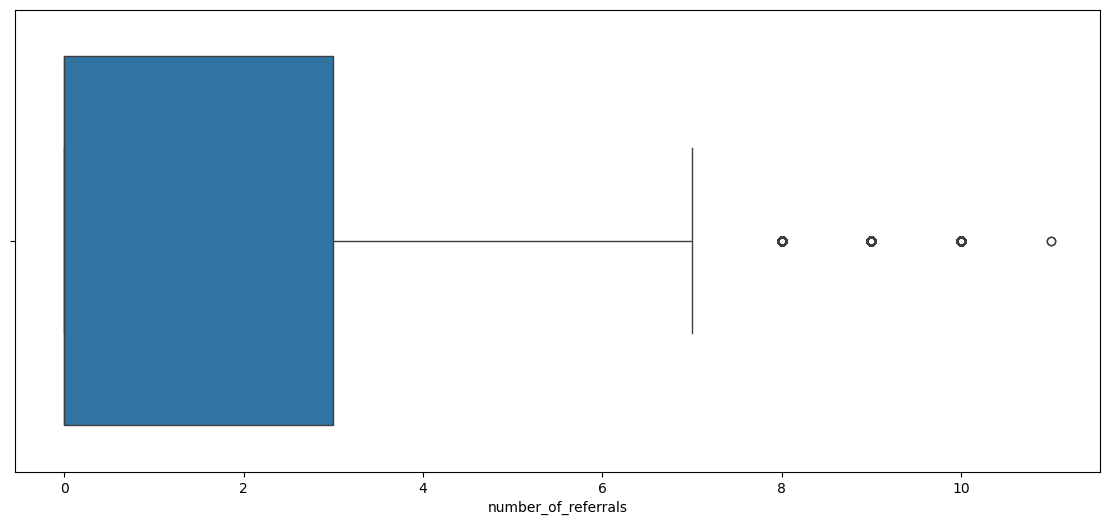

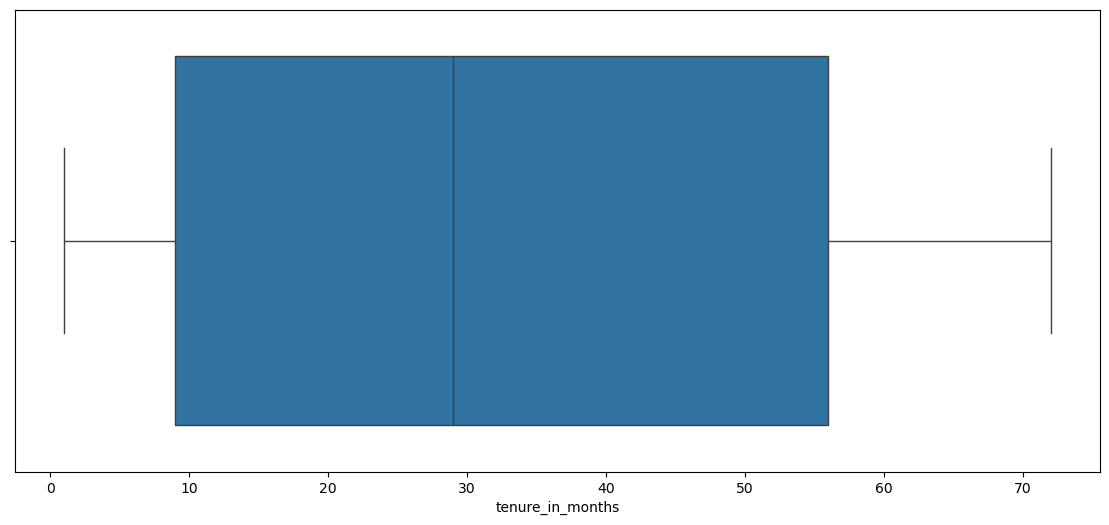

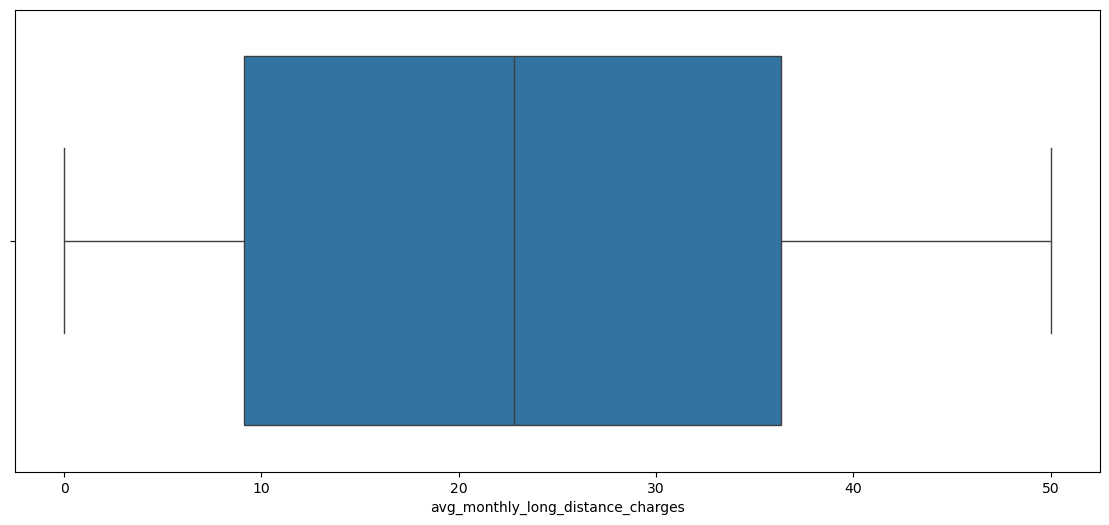

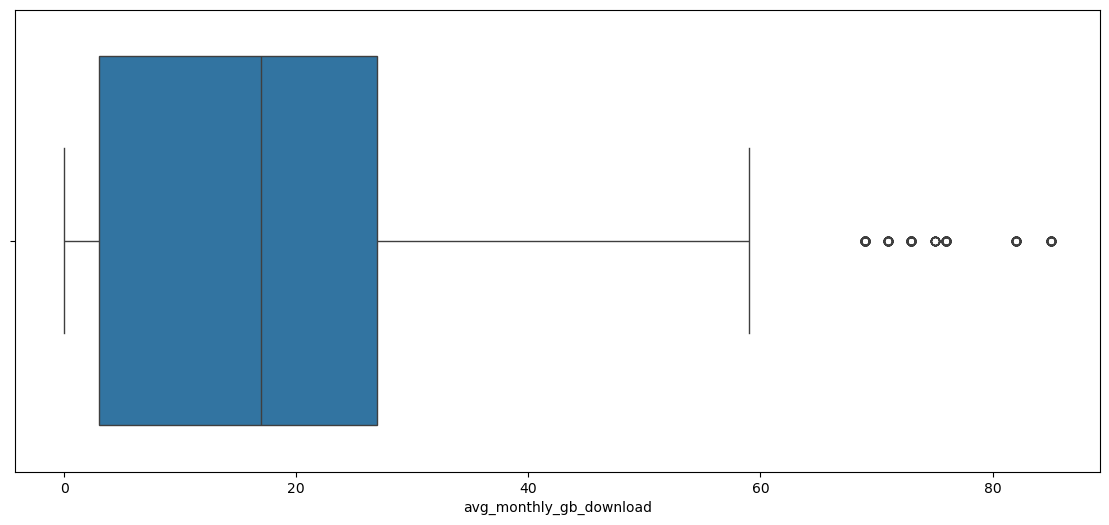

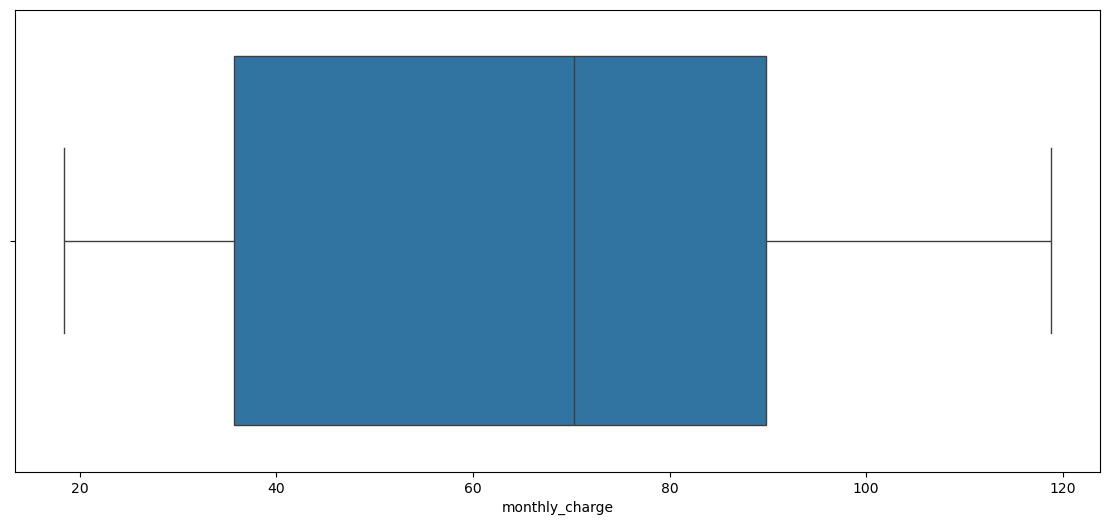

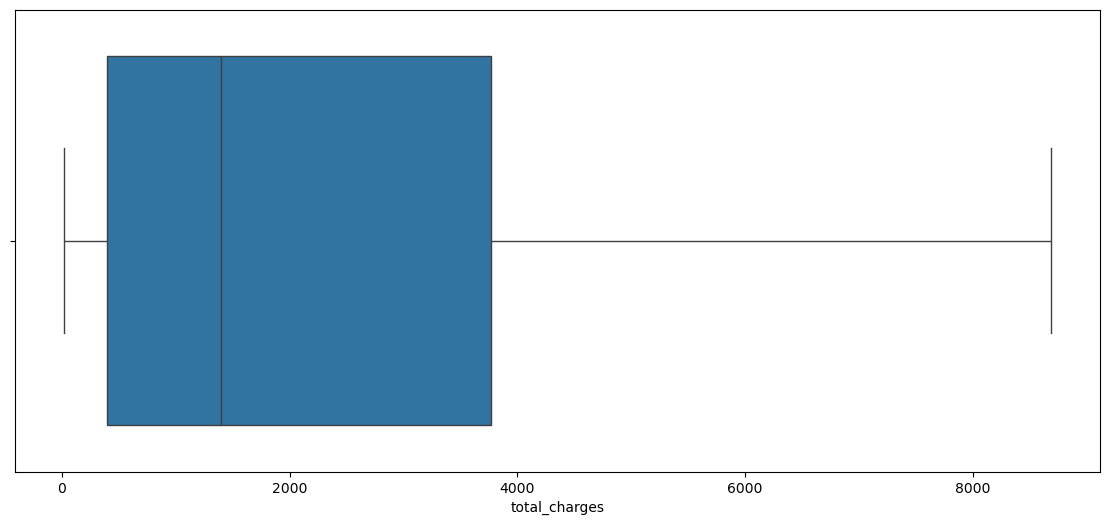

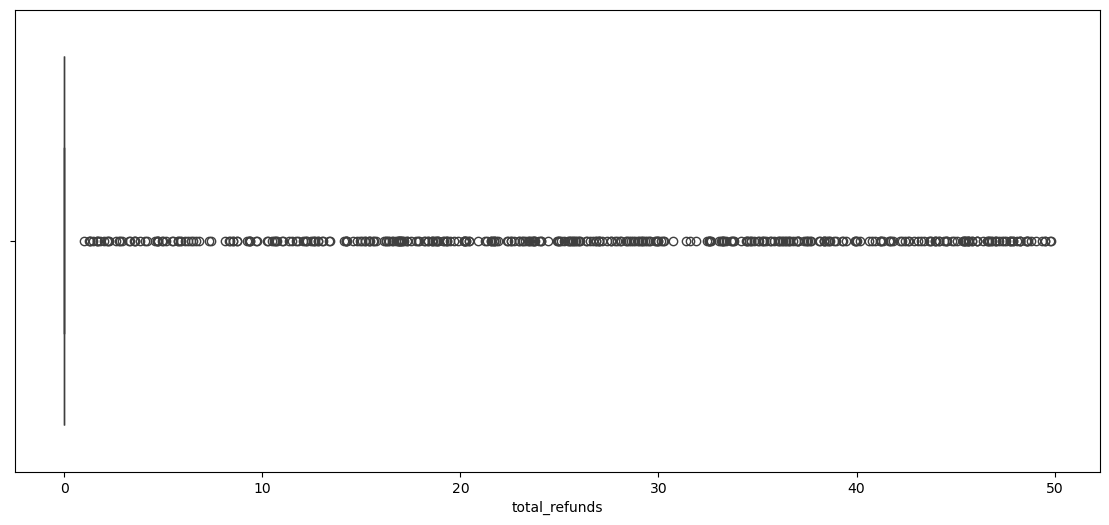

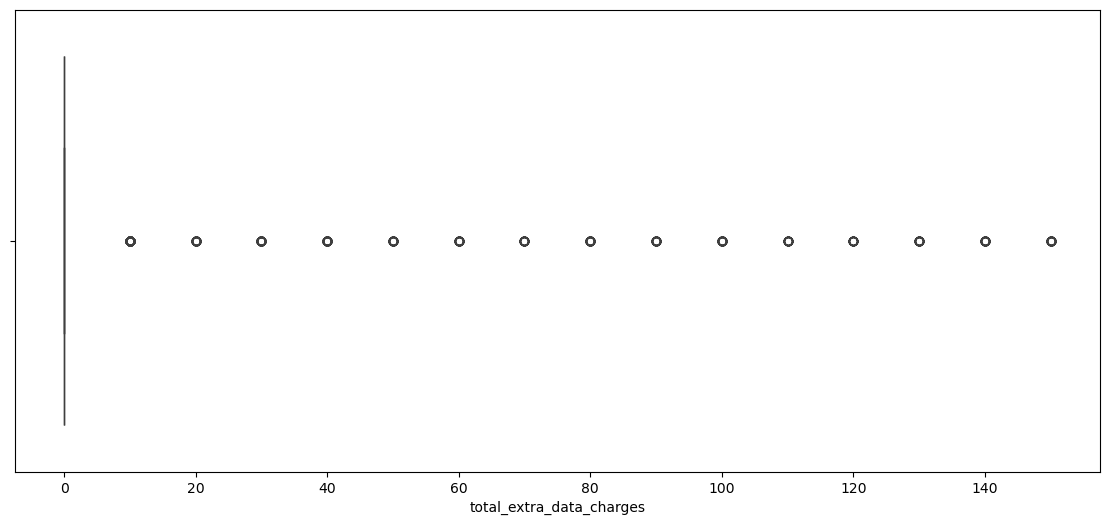

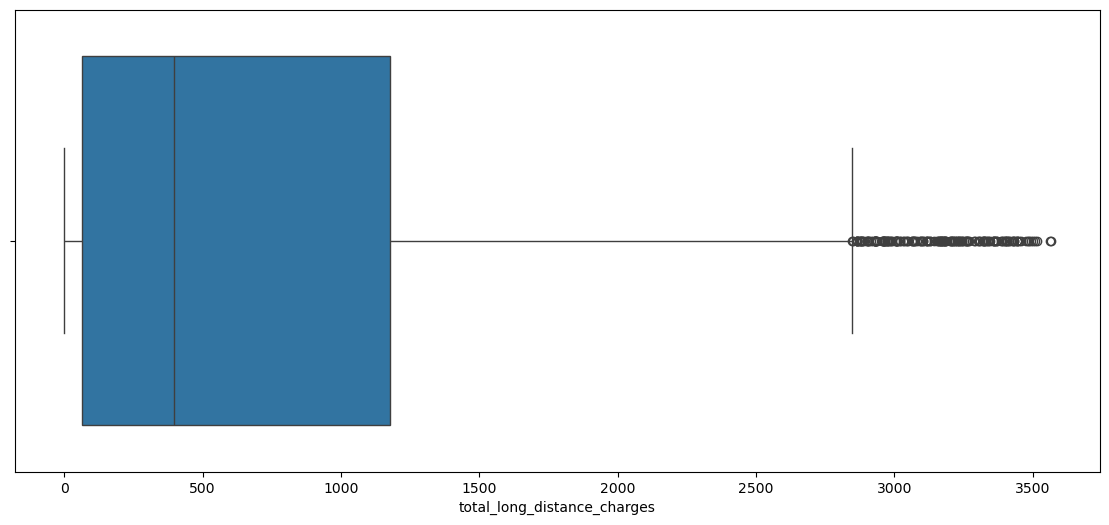

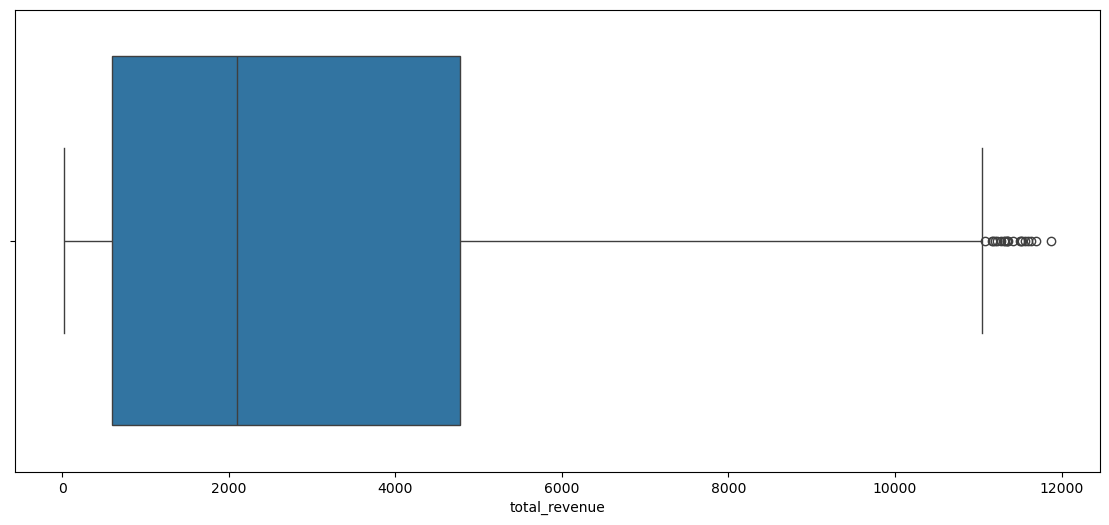

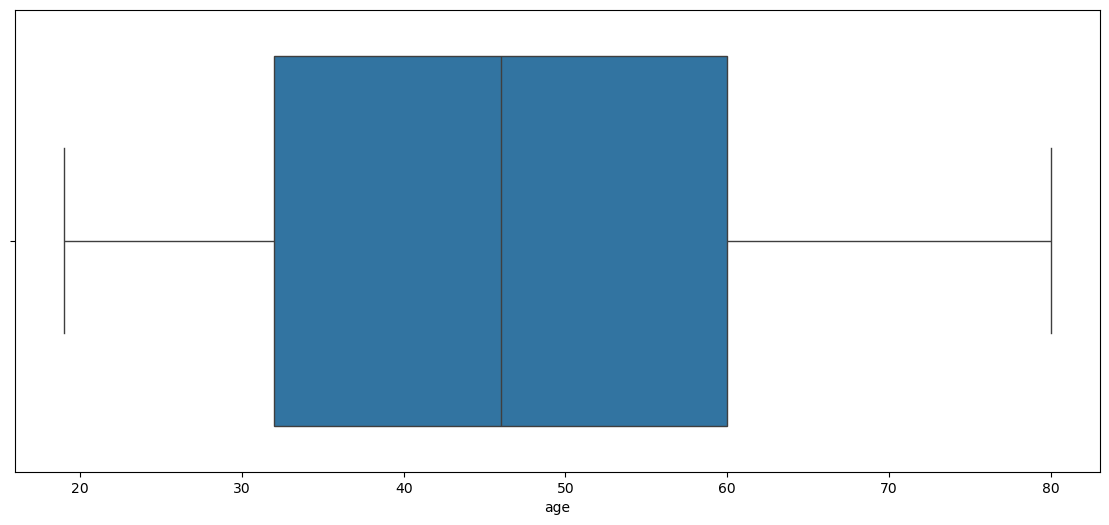

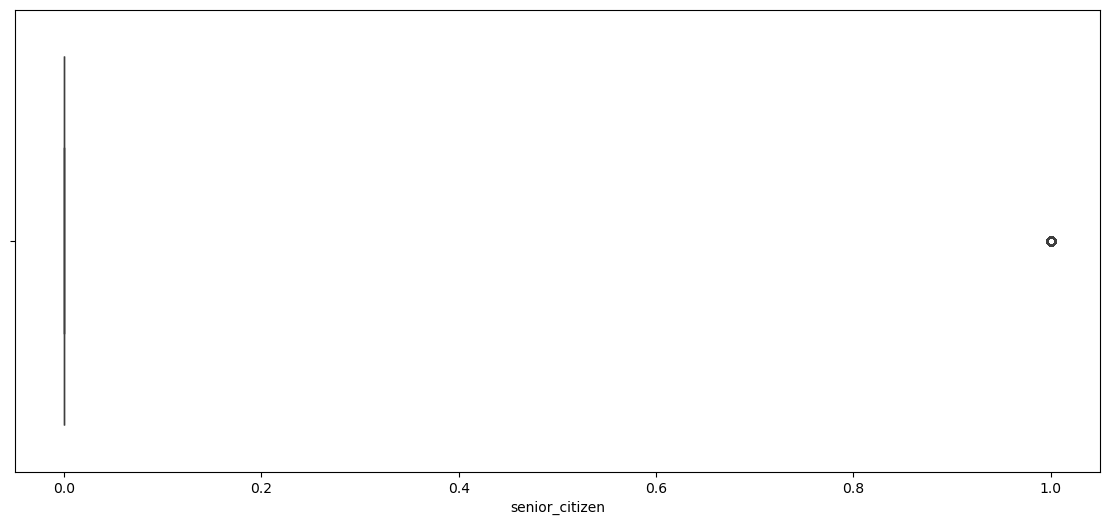

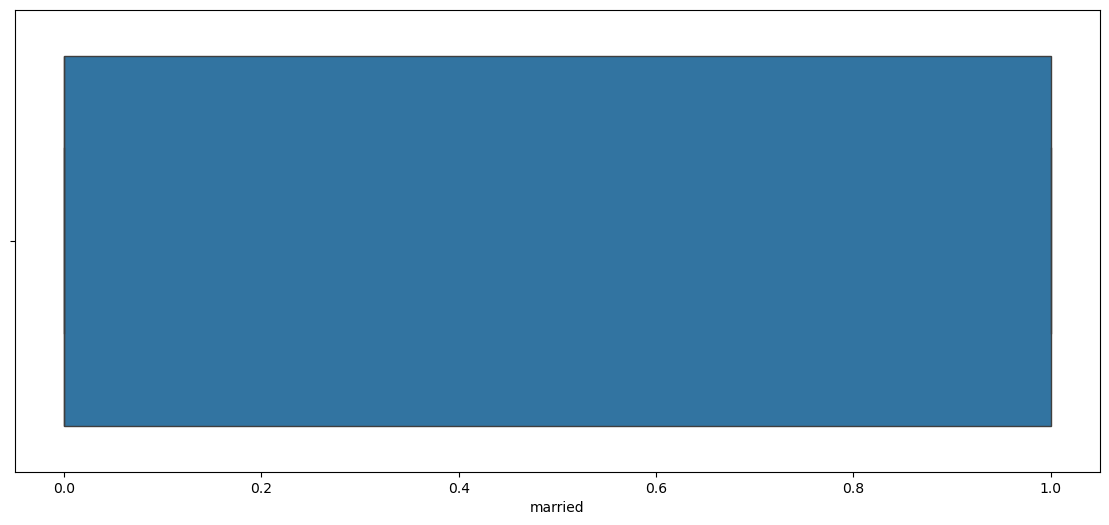

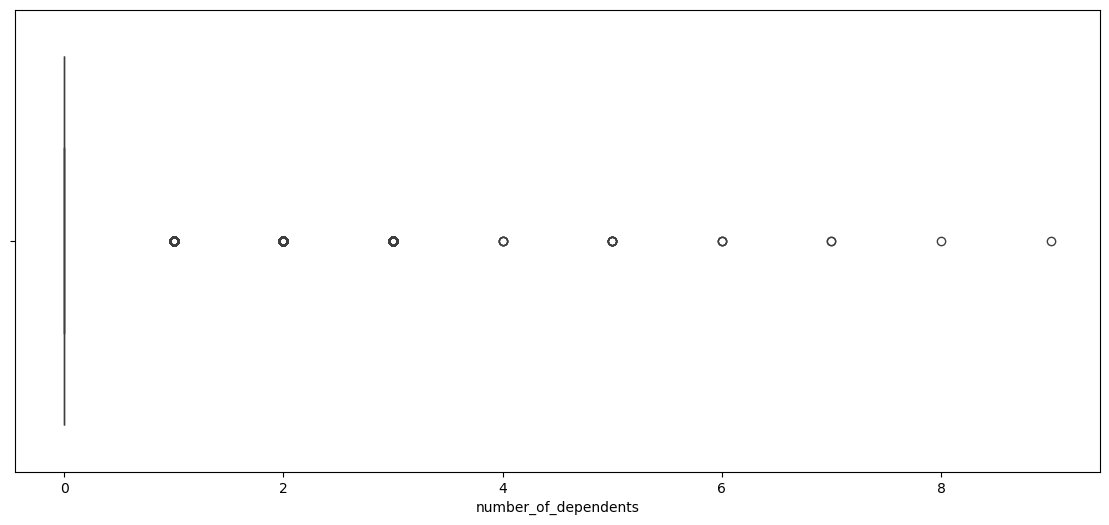

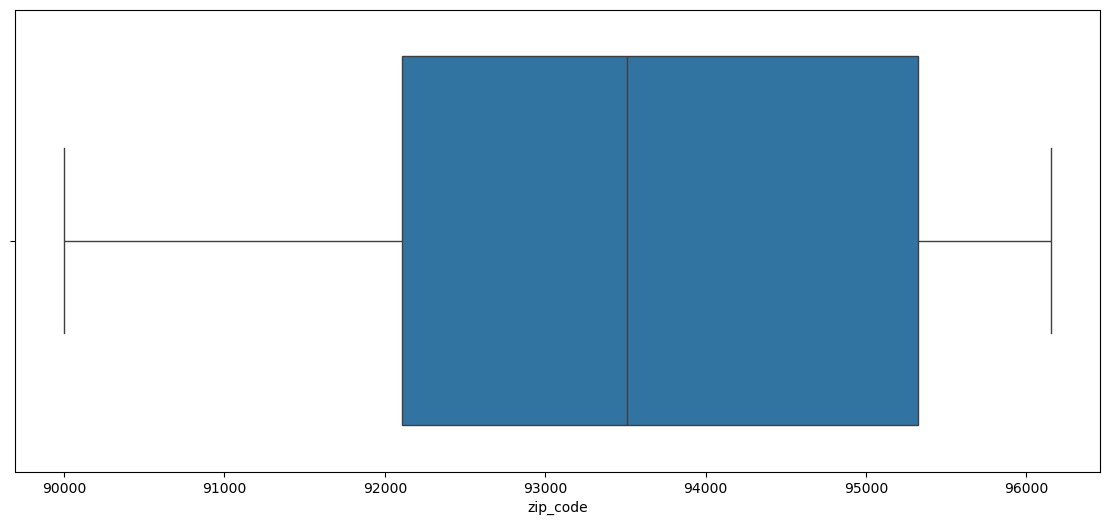

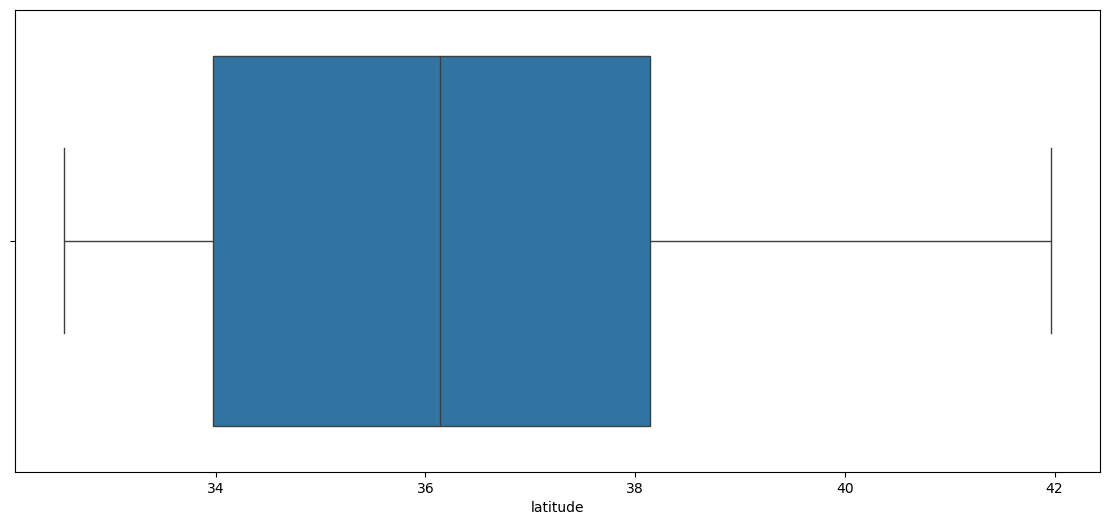

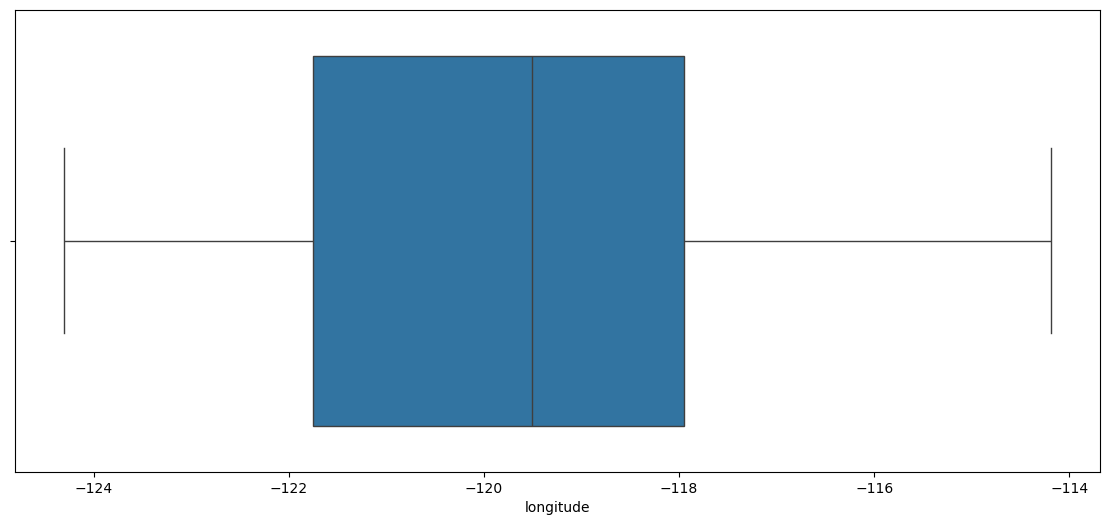

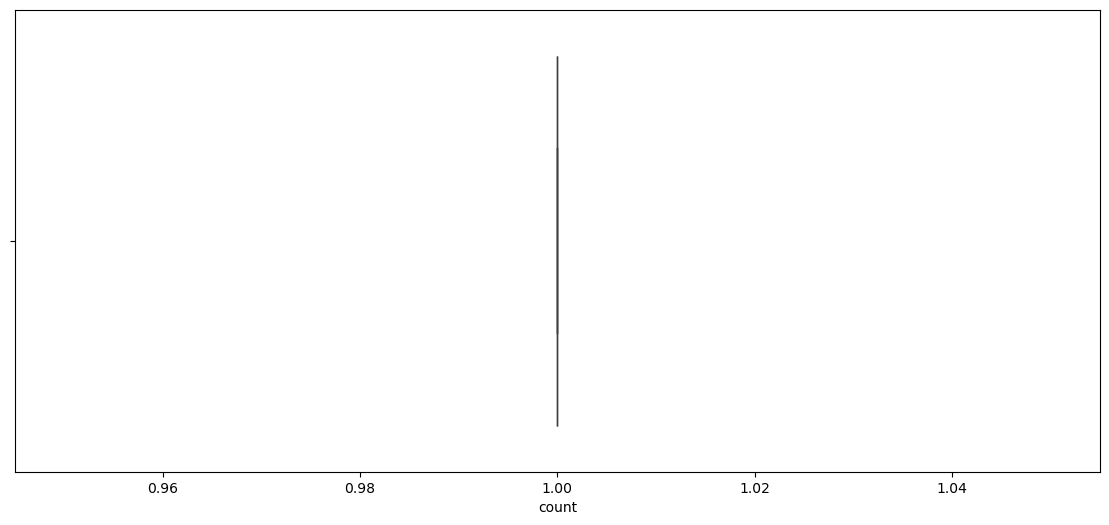

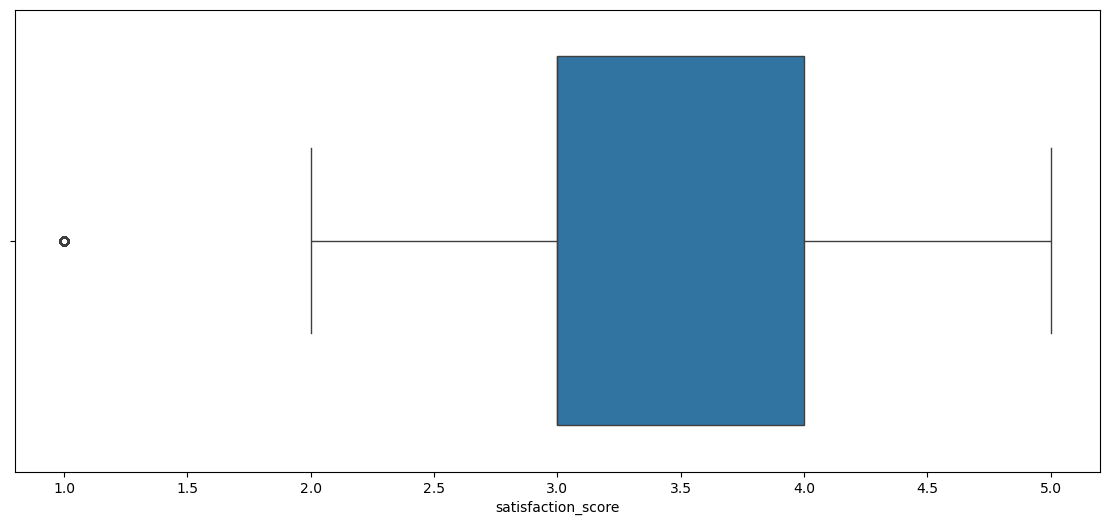

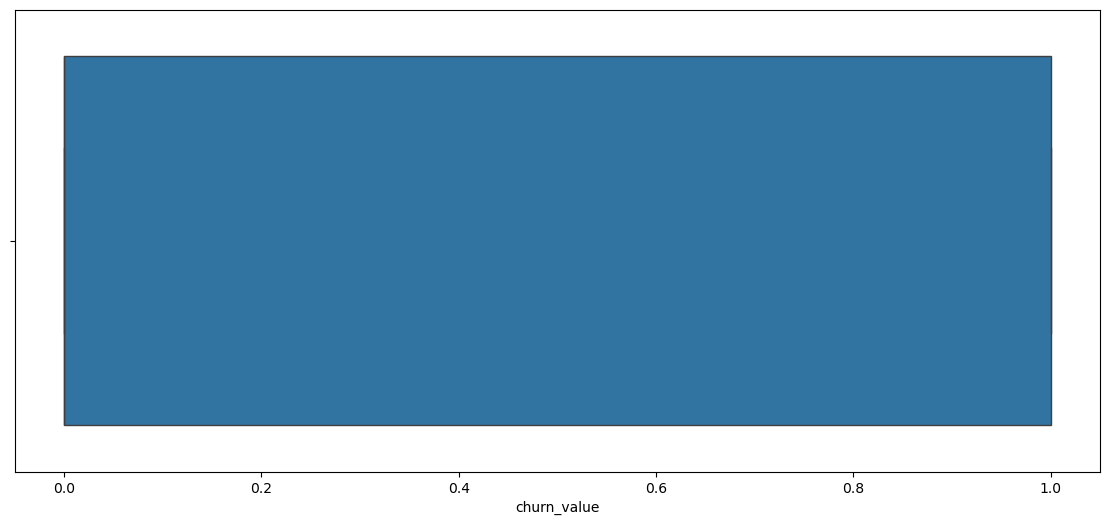

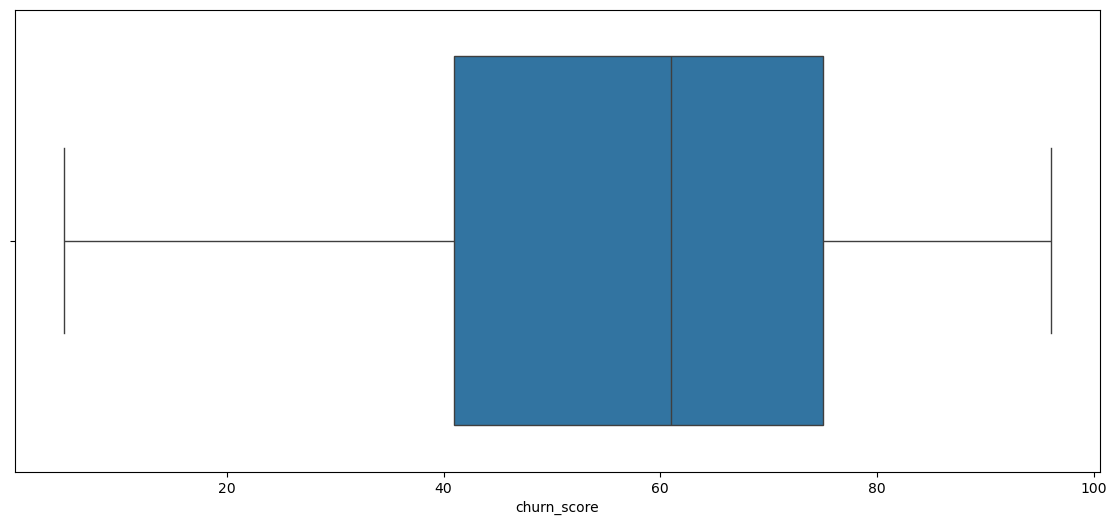

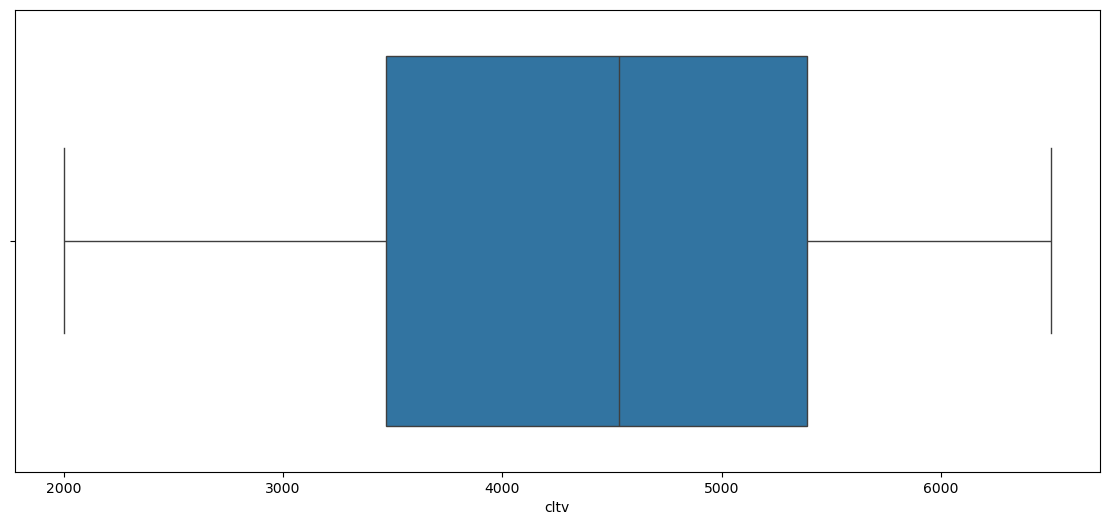

In [26]:
for col in df_numerical_variables.columns:
    if col in bivalue_columns:
        continue
    fig, (ax1) = plt.subplots(1,1, figsize = (14,6))
    sns.boxplot(ax = ax1, data = df_numerical_variables, x = col)
plt.close()
#Using boxplots to better visualize the outliers

In [27]:
for col in ['number_of_dependents', 'total_extra_data_charges', 'total_refunds']: 
    print(df.select(col).unique())
    print()

shape: (10, 1)
┌──────────────────────┐
│ number_of_dependents │
│ ---                  │
│ i64                  │
╞══════════════════════╡
│ 9                    │
│ 3                    │
│ 0                    │
│ 6                    │
│ 7                    │
│ 1                    │
│ 4                    │
│ 8                    │
│ 2                    │
│ 5                    │
└──────────────────────┘

shape: (16, 1)
┌──────────────────────────┐
│ total_extra_data_charges │
│ ---                      │
│ i64                      │
╞══════════════════════════╡
│ 0                        │
│ 140                      │
│ 30                       │
│ 60                       │
│ 90                       │
│ …                        │
│ 130                      │
│ 20                       │
│ 50                       │
│ 80                       │
│ 110                      │
└──────────────────────────┘

shape: (395, 1)
┌───────────────┐
│ total_refunds │
│ ---           │
│ f64

In [28]:

df.select(
    pl.col('number_of_dependents').value_counts(sort=True)
).unnest('number_of_dependents')


number_of_dependents,count
i64,u32
0,4345
2,434
1,429
3,407
5,8
4,4
6,3
7,2
8,1


In [29]:
df.select(
    pl.col('senior_citizen').value_counts(sort=True)
).unnest('senior_citizen')

senior_citizen,count
i64,u32
0,4717
1,917


In [30]:
df.select(
    pl.col('churn_value').value_counts(sort=True)
).unnest('churn_value')

churn_value,count
i64,u32
0,4129
1,1505


<a class="anchor" id="1st-bullet">

## 1.1Pre-Processing

</a>

In [31]:
df.columns

['customer_id',
 'referred_a_friend',
 'number_of_referrals',
 'tenure_in_months',
 'offer',
 'phone_service',
 'avg_monthly_long_distance_charges',
 'multiple_lines',
 'internet_service',
 'internet_type',
 'avg_monthly_gb_download',
 'online_security',
 'online_backup',
 'device_protection_plan',
 'premium_tech_support',
 'streaming_tv',
 'streaming_movies',
 'streaming_music',
 'unlimited_data',
 'contract',
 'paperless_billing',
 'payment_method',
 'monthly_charge',
 'total_charges',
 'total_refunds',
 'total_extra_data_charges',
 'total_long_distance_charges',
 'total_revenue',
 'gender',
 'age',
 'under_30',
 'senior_citizen',
 'married',
 'number_of_dependents',
 'city',
 'zip_code',
 'lat_long',
 'latitude',
 'longitude',
 'count',
 'quarter',
 'satisfaction_score',
 'customer_status',
 'churn_label',
 'churn_value',
 'churn_score',
 'cltv',
 'churn_category',
 'churn_reason',
 'population']

In [32]:
for col in df.select(pl.exclude(pl.NUMERIC_DTYPES)).columns:
    print(f"Coluna: {col}")
    print(df.select(col).unique())
    print()

Coluna: customer_id
shape: (5_634, 1)
┌─────────────┐
│ customer_id │
│ ---         │
│ str         │
╞═════════════╡
│ 7596-LDUXP  │
│ 2321-OMBXY  │
│ 8058-DMYRU  │
│ 0103-CSITQ  │
│ 6575-SUVOI  │
│ …           │
│ 2419-FSORS  │
│ 9526-JAWYF  │
│ 6322-HRPFA  │
│ 0742-NXBGR  │
│ 1334-PDUKM  │
└─────────────┘

Coluna: referred_a_friend
shape: (2, 1)
┌───────────────────┐
│ referred_a_friend │
│ ---               │
│ str               │
╞═══════════════════╡
│ No                │
│ Yes               │
└───────────────────┘

Coluna: offer
shape: (6, 1)
┌─────────┐
│ offer   │
│ ---     │
│ str     │
╞═════════╡
│ Offer A │
│ Offer E │
│ Offer B │
│ Offer D │
│ None    │
│ Offer C │
└─────────┘

Coluna: phone_service
shape: (2, 1)
┌───────────────┐
│ phone_service │
│ ---           │
│ str           │
╞═══════════════╡
│ No            │
│ Yes           │
└───────────────┘

Coluna: multiple_lines
shape: (2, 1)
┌────────────────┐
│ multiple_lines │
│ ---            │
│ str            │
╞════

C:\Users\Danie\AppData\Local\Temp\ipykernel_22524\2074748385.py:1: DeprecationWarning: `NUMERIC_DTYPES` was deprecated in version 1.0.0. Define your own data type groups or use the `polars.selectors` module for selecting columns of a certain data type.
  for col in df.select(pl.exclude(pl.NUMERIC_DTYPES)).columns:


<a class="anchor" id="1st-bullet">

### 1.1.2 Solve Outliers

</a>

In [33]:
q1, q3 = df.select([
    pl.col("number_of_referrals").quantile(0.25).alias("q1"),
    pl.col("number_of_referrals").quantile(0.75).alias("q3")
]).row(0)

upper_bound = q3 + (q3 - q1) * 1.5

df = df.with_columns(
    pl.col("number_of_referrals")
      .clip(upper_bound=upper_bound)
)

In [34]:
q1, q3 = df.select([
    pl.col("avg_monthly_gb_download").quantile(0.25).alias("q1"),
    pl.col("avg_monthly_gb_download").quantile(0.75).alias("q3")
]).row(0)

upper_bound = q3 + (q3 - q1) * 1.5

df = df.with_columns(
    pl.col("avg_monthly_gb_download")
      .clip(upper_bound=upper_bound)
)

In [35]:
q1, q3 = df.select([
    pl.col("total_long_distance_charges").quantile(0.25).alias("q1"),
    pl.col("total_long_distance_charges").quantile(0.75).alias("q3")
]).row(0)

upper_bound = q3 + (q3 - q1) * 1.5

df = df.with_columns(
    pl.col("total_long_distance_charges")
      .clip(upper_bound=upper_bound)
)

In [36]:
q1, q3 = df.select([
    pl.col("total_revenue").quantile(0.25).alias("q1"),
    pl.col("total_revenue").quantile(0.75).alias("q3")
]).row(0)

upper_bound = q3 + (q3 - q1) * 1.5

df = df.with_columns(
    pl.col("total_revenue")
      .clip(upper_bound=upper_bound)
)

In [37]:
q1, q3 = df.select([
    pl.col("satisfaction_score").quantile(0.25).alias("q1"),
    pl.col("satisfaction_score").quantile(0.75).alias("q3")
]).row(0)

lower_bound = q1 - (q3 - q1) * 1.5

df = df.with_columns(
    pl.when(pl.col("satisfaction_score") < lower_bound)
      .then(pl.lit(lower_bound))
      .otherwise(pl.col("satisfaction_score"))
      .alias("satisfaction_score")
)

<a class="anchor" id="1st-bullet">

### 1.1.2 Power Transformation
</a>

In [38]:
cols = [
    'avg_monthly_long_distance_charges',
    'avg_monthly_gb_download',
    'monthly_charge',
    'total_charges',
    'total_refunds',
    'total_extra_data_charges',
    'total_revenue',
    'population'
]
for col in cols:
    df = df.with_columns(
        pl.col(col).cbrt().alias(col)
    )


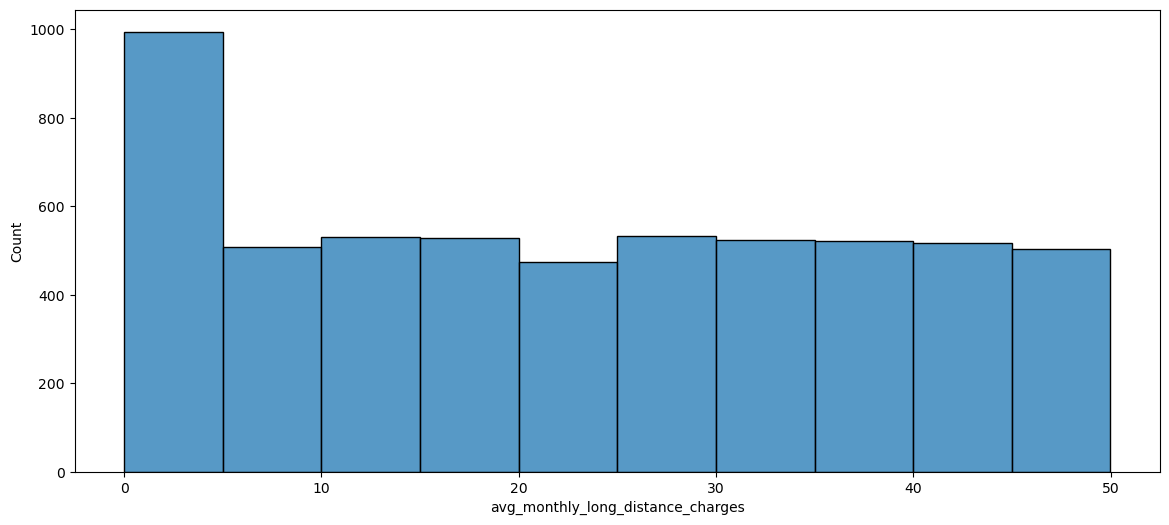

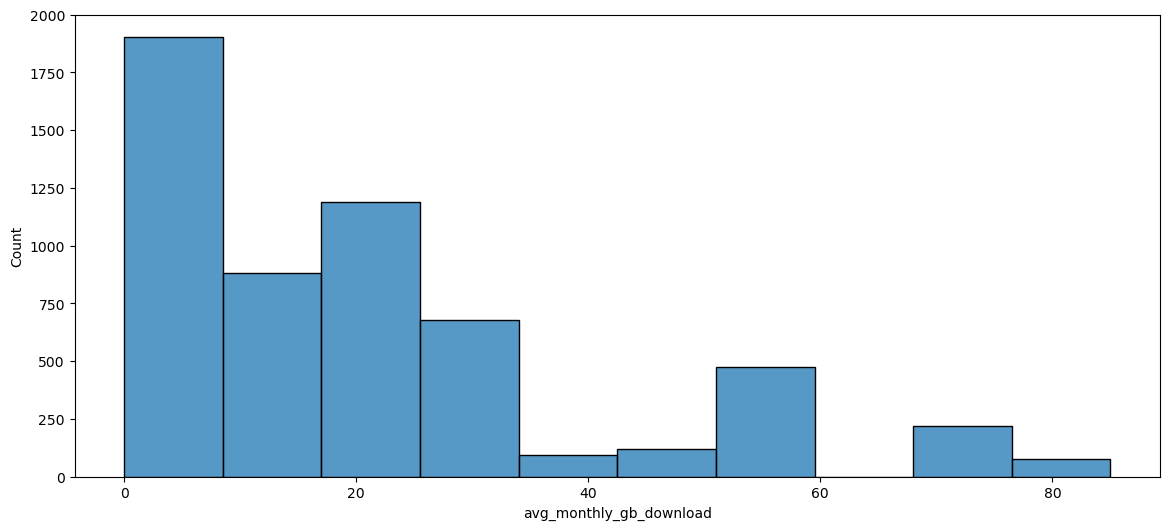

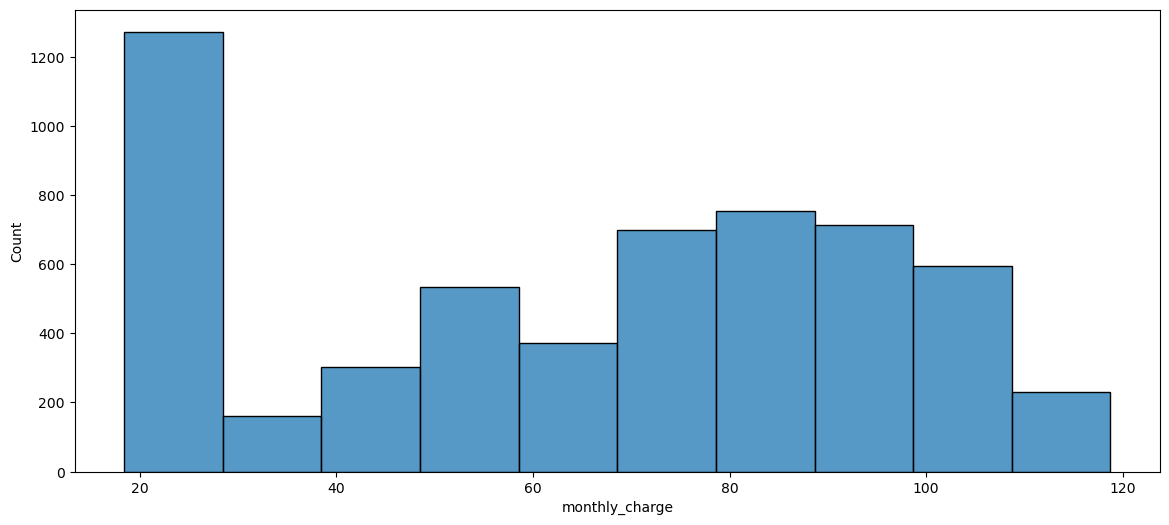

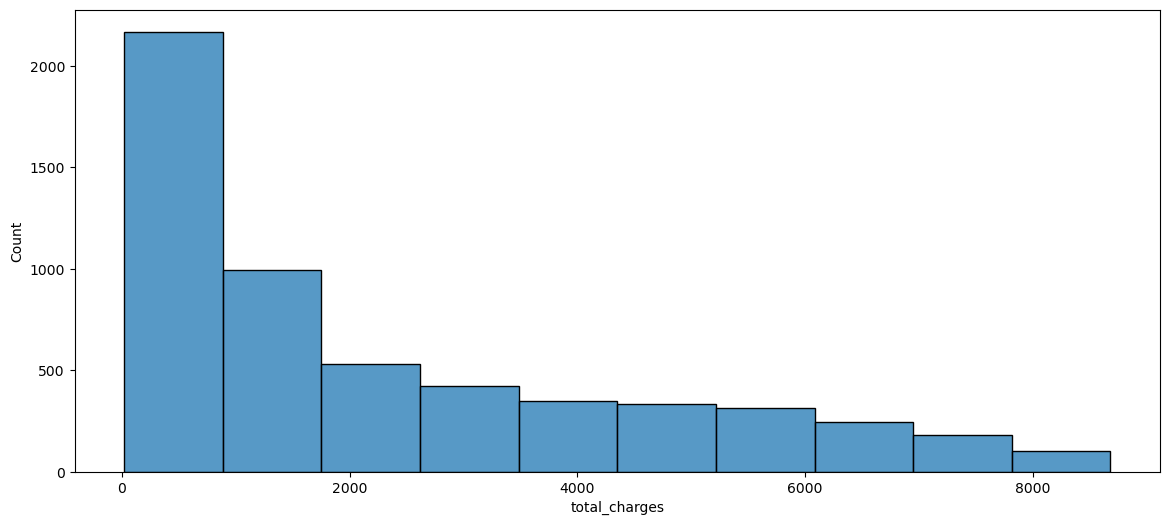

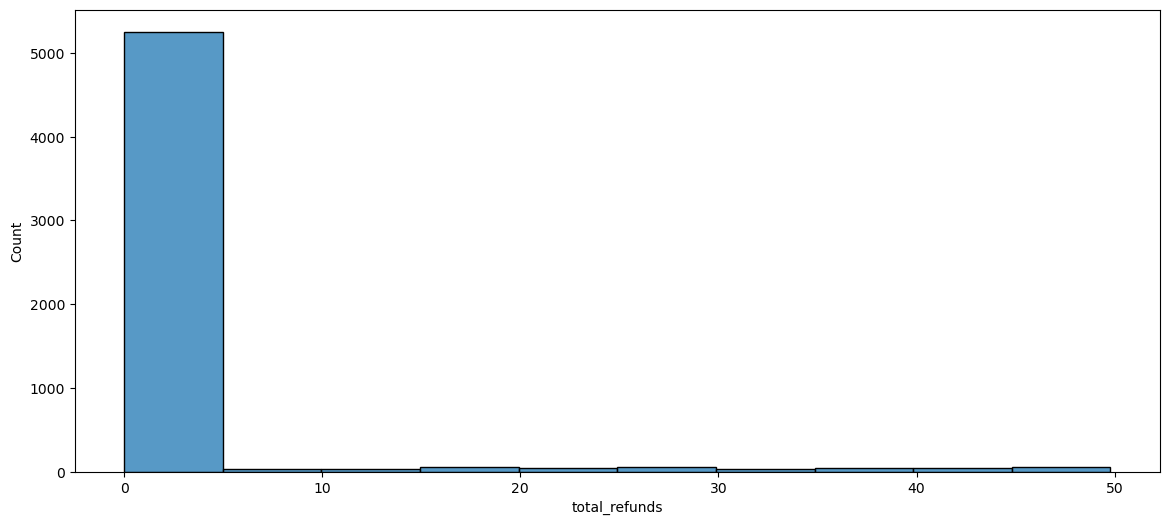

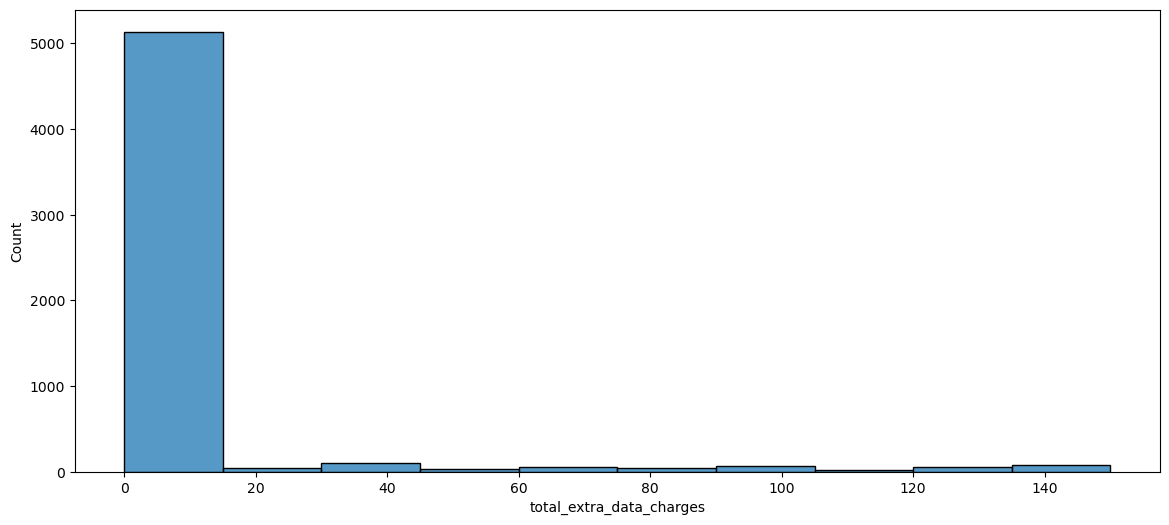

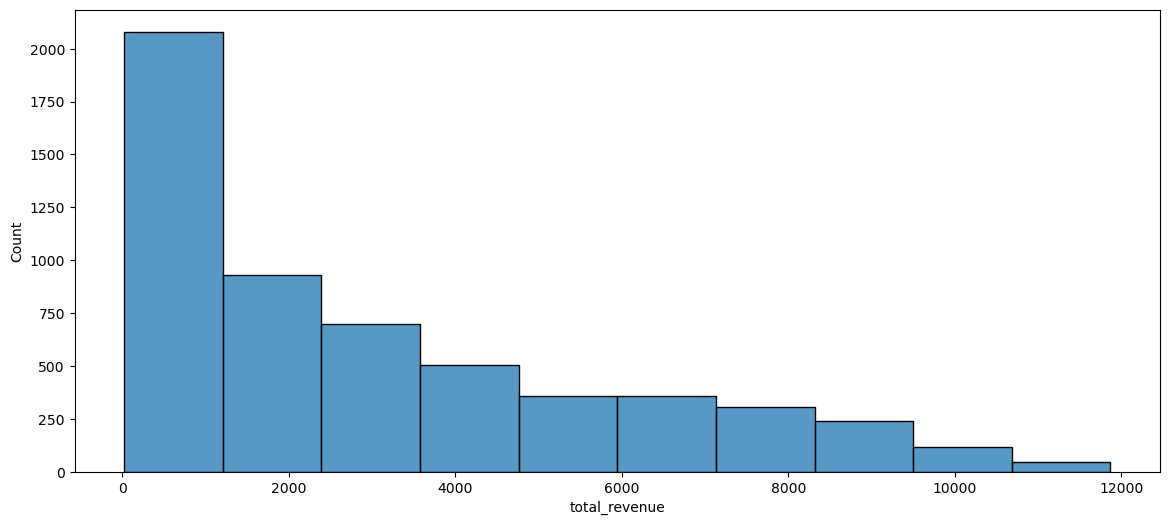

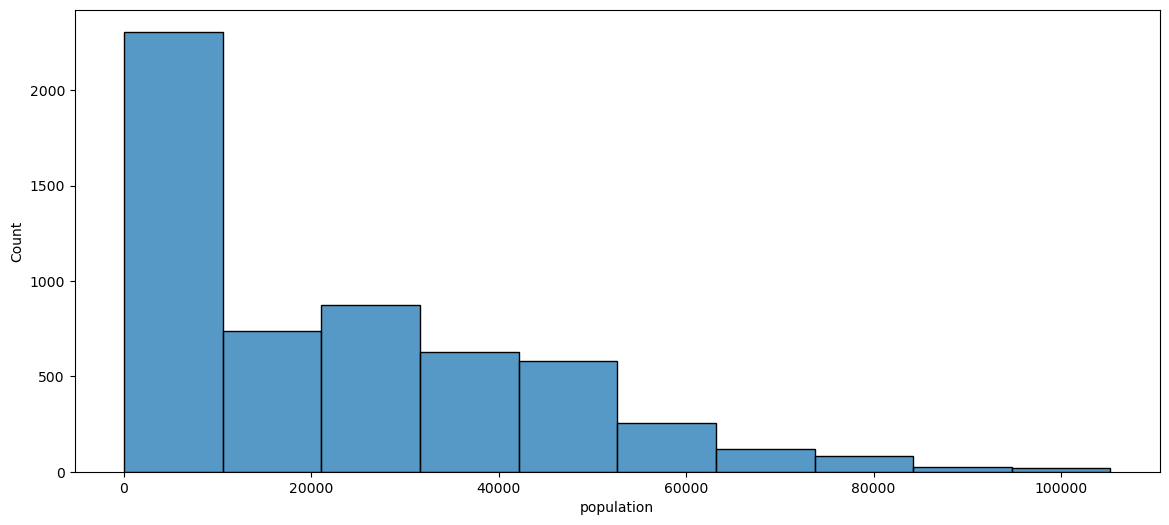

In [39]:
for col in cols:
    fig, (ax1) = plt.subplots(1,1, figsize = (14,6)) 
    sns.histplot(ax = ax1, data = df_numerical_variables.to_pandas(), x = col, bins = 10) #df_numerical_variables.to_pandas



<a class="anchor" id="1st-bullet">

### 1.1.3 Encoding variables

</a>

In [40]:
valid_vals = ["yes", "no", "male", "female"]

for col in bivalue_columns:
    df = df.with_columns(
        pl.col(col).str.to_lowercase().str.strip_chars()
    )

    mode_val = (
        df
        .filter(pl.col(col).is_in(valid_vals))
        .select(pl.col(col).mode())
        .item()
    )

    df = df.with_columns(
        pl.when(pl.col(col).is_in(valid_vals))
            .then(pl.col(col))
            .otherwise(pl.lit(mode_val))
            .alias(col)
    )

    df = df.with_columns(
        pl.when(pl.col(col).is_in(["yes", "male"]))
            .then(1)
          .when(pl.col(col).is_in(["no", "female"]))
            .then(0)
          .otherwise(None)
          .cast(pl.Int32)
          .alias(col)
    )

In [41]:
df

customer_id,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,gender,age,under_30,senior_citizen,married,number_of_dependents,city,zip_code,lat_long,latitude,longitude,count,quarter,satisfaction_score,customer_status,churn_label,churn_value,churn_score,cltv,churn_category,churn_reason,population
str,i32,i64,i64,str,i32,f64,i32,i32,str,f64,i32,i32,i32,i32,i32,i32,i32,i32,str,i32,str,f64,f64,f64,f64,f64,f64,i32,i64,f64,i64,i64,i64,str,i64,str,f64,f64,i64,str,f64,str,i32,i64,i64,i64,str,str,f64
"""4450-YOOHP""",0,0,39,"""None""",0,0.0,0,1,"""DSL""",1.817121,0,0,1,0,1,1,1,1,"""Month-to-Month""",1,"""Credit Card""",3.699927,12.397346,1.519739,0.0,0.0,12.389729,0,56,null,0,0,0,"""Sacramento""",95818,"""38.556306, -121.495817""",38.556306,-121.495817,1,"""Q3""",4.0,"""Stayed""",0,0,31,5433,"""NO_LABEL""","""NO_LABEL""",27.725637
"""3585-ISXZP""",0,0,8,"""None""",1,3.095449,1,1,"""Fiber Optic""",2.289428,0,0,0,0,1,1,1,1,"""Month-to-Month""",0,"""Bank Withdrawal""",4.573286,9.197684,0.0,0.0,237.28,10.051006,0,53,null,0,0,0,"""Indio""",92201,"""33.713891, -116.237257""",33.713891,-116.237257,1,"""Q3""",3.0,"""Churned""",1,1,95,5335,"""Attitude""","""Attitude of support person""",38.328409
"""7601-DHFWZ""",0,0,48,"""Offer B""",1,3.135289,1,0,"""None""",0.0,0,0,0,0,0,0,0,0,"""Two Year""",0,"""Credit Card""",2.884499,10.576315,0.0,0.0,1479.36,13.859843,0,54,null,0,0,0,"""Simi Valley""",93063,"""34.296813, -118.685703""",34.296813,-118.685703,1,"""Q3""",3.0,"""Stayed""",0,0,66,3948,"""NO_LABEL""","""NO_LABEL""",36.599777
"""1205-WNWPJ""",0,0,7,"""Offer E""",1,1.308427,0,1,"""DSL""",2.802039,0,0,0,1,1,0,0,1,"""Month-to-Month""",1,"""Credit Card""",3.903963,7.464723,0.0,0.0,15.68,7.557367,0,54,null,0,0,0,"""Lakehead""",96051,"""40.883853, -122.418258""",40.883853,-122.418258,1,"""Q3""",3.0,"""Churned""",1,1,91,4661,"""Other""","""Moved""",10.731806
"""3635-JBPSG""",0,0,15,"""None""",0,0.0,0,1,"""DSL""",2.843867,0,1,0,0,0,1,1,1,"""Two Year""",1,"""Credit Card""",3.385405,8.448361,0.0,0.0,0.0,8.448361,0,49,null,0,0,0,"""Van Nuys""",91406,"""34.195685, -118.490752""",34.195685,-118.490752,1,"""Q3""",4.0,"""Stayed""",0,0,55,2118,"""NO_LABEL""","""NO_LABEL""",36.851855
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""3629-WEAAM""",0,0,8,"""None""",1,3.557947,0,1,"""DSL""",3.979057,0,0,1,1,0,1,1,0,"""Month-to-Month""",0,"""Mailed Check""",4.002082,7.958378,0.0,2.154435,360.32,9.56236,0,19,null,0,0,0,"""Forbestown""",95941,"""39.531028, -121.24807""",39.531028,-121.24807,1,"""Q3""",5.0,"""Stayed""",0,0,25,2804,"""NO_LABEL""","""NO_LABEL""",7.67443
"""3801-HMYNL""",1,1,1,"""None""",1,3.186335,0,1,"""Fiber Optic""",2.620741,0,0,0,0,1,1,1,1,"""Month-to-Month""",0,"""Mailed Check""",4.467252,4.467252,0.0,0.0,32.35,4.952891,1,44,null,0,1,0,"""Brooks""",95606,"""38.809804, -122.241383""",38.809804,-122.241383,1,"""Q3""",1.5,"""Churned""",1,1,68,3123,"""Competitor""","""Competitor had better devices""",7.255842
"""0302-JOIVN""",1,1,8,"""None""",1,2.565217,0,1,"""Fiber Optic""",1.817121,0,1,1,0,1,1,1,1,"""Month-to-Month""",0,"""Bank Withdrawal""",4.659314,9.446234,0.0,0.0,135.04,9.925919,0,47,null,0,1,0,"""San Diego""",92109,"""32.787836, -117.232354""",32.787836,-117.232376,1,"""Q3""",2.0,"""Churned""",1,1,76,2750,"""Competitor""","""Competitor made better offer""",35.852794


<a class="anchor" id="1st-bullet">

### 1.1.4 Double check for null values and duplicates after these all transformations

</a>

In [42]:
df.null_count()

customer_id,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,gender,age,under_30,senior_citizen,married,number_of_dependents,city,zip_code,lat_long,latitude,longitude,count,quarter,satisfaction_score,customer_status,churn_label,churn_value,churn_score,cltv,churn_category,churn_reason,population
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5634,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
df.filter(df.is_duplicated())

customer_id,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,gender,age,under_30,senior_citizen,married,number_of_dependents,city,zip_code,lat_long,latitude,longitude,count,quarter,satisfaction_score,customer_status,churn_label,churn_value,churn_score,cltv,churn_category,churn_reason,population
str,i32,i64,i64,str,i32,f64,i32,i32,str,f64,i32,i32,i32,i32,i32,i32,i32,i32,str,i32,str,f64,f64,f64,f64,f64,f64,i32,i64,f64,i64,i64,i64,str,i64,str,f64,f64,i64,str,f64,str,i32,i64,i64,i64,str,str,f64


In [44]:
for col in df.select(pl.exclude(pl.NUMERIC_DTYPES)).columns:
    if col not in bivalue_columns:
        print(f"Coluna: {col}")
        print(df.select(col).unique())
        print()

Coluna: customer_id
shape: (5_634, 1)
┌─────────────┐
│ customer_id │
│ ---         │
│ str         │
╞═════════════╡
│ 3746-EUBYR  │
│ 7450-NWRTR  │
│ 3137-NYQQI  │
│ 3654-ARMGP  │
│ 1623-NLDOT  │
│ …           │
│ 7696-CFTAT  │
│ 7550-WIQVA  │
│ 1907-UBQFC  │
│ 9367-OIUXP  │
│ 7325-ENZFI  │
└─────────────┘

Coluna: offer
shape: (6, 1)
┌─────────┐
│ offer   │
│ ---     │
│ str     │
╞═════════╡
│ Offer C │
│ Offer A │
│ Offer B │
│ Offer E │
│ None    │
│ Offer D │
└─────────┘

Coluna: internet_type
shape: (4, 1)
┌───────────────┐
│ internet_type │
│ ---           │
│ str           │
╞═══════════════╡
│ None          │
│ Cable         │
│ Fiber Optic   │
│ DSL           │
└───────────────┘

Coluna: contract
shape: (3, 1)
┌────────────────┐
│ contract       │
│ ---            │
│ str            │
╞════════════════╡
│ One Year       │
│ Month-to-Month │
│ Two Year       │
└────────────────┘

Coluna: payment_method
shape: (3, 1)
┌─────────────────┐
│ payment_method  │
│ ---             │

C:\Users\Danie\AppData\Local\Temp\ipykernel_22524\182089192.py:1: DeprecationWarning: `NUMERIC_DTYPES` was deprecated in version 1.0.0. Define your own data type groups or use the `polars.selectors` module for selecting columns of a certain data type.
  for col in df.select(pl.exclude(pl.NUMERIC_DTYPES)).columns:


In [45]:
valid_vals = ["Offer A", "Offer B", "Offer C","Offer D", "Offer E"]
col = "offer"
mode_val = (
    df
    .filter(pl.col(col).is_in(valid_vals))
    .select(pl.col(col).mode())
    .item()
)

df = df.with_columns(
    pl.when(pl.col(col).is_in(valid_vals))
        .then(pl.col(col))
        .otherwise(pl.lit(mode_val))
        .alias(col)
)

df = df.with_columns(
    pl.when(pl.col(col) == "Offer A")
        .then(1)
        .when(pl.col(col) == "Offer B")
        .then(2)
        .when(pl.col(col) == "Offer C")
        .then(3)
        .when(pl.col(col) == "Offer D")
        .then(4)
        .when(pl.col(col) == "Offer E")
        .then(5)
        .otherwise(None)
        .cast(pl.Int32)
        .alias(col)
)

In [46]:
valid_vals = ["DSL", "Cable", "Fiber Optic"]
col = "internet_type"
mode_val = (
    df
    .filter(pl.col(col).is_in(valid_vals))
    .select(pl.col(col).mode())
    .item()
)

df = df.with_columns(
    pl.when(pl.col(col).is_in(valid_vals))
        .then(pl.col(col))
        .otherwise(pl.lit(mode_val))
        .alias(col)
)

df = df.with_columns(
    pl.when(pl.col(col) == "DSL")
        .then(1)
        .when(pl.col(col) == "Cable")
        .then(2)
        .when(pl.col(col) == "Fiber Optic")
        .then(3)
        .otherwise(None)
        .cast(pl.Int32)
        .alias(col)
)

In [47]:
valid_vals = ["Month-to-Month", "One Year", "Two Year"]
col = "contract"
mode_val = (
    df
    .filter(pl.col(col).is_in(valid_vals))
    .select(pl.col(col).mode())
    .item()
)

df = df.with_columns(
    pl.when(pl.col(col).is_in(valid_vals))
        .then(pl.col(col))
        .otherwise(pl.lit(mode_val))
        .alias(col)
)

df = df.with_columns(
    pl.when(pl.col(col) == "Month-to-Month")
        .then(1)
        .when(pl.col(col) == "One Year")
        .then(2)
        .when(pl.col(col) == "Two Year")
        .then(3)
        .otherwise(None)
        .cast(pl.Int32)
        .alias(col)
)

In [48]:
valid_vals = ["Churned", "Joined", "Stayed"]
col = "customer_status"
mode_val = (
    df
    .filter(pl.col(col).is_in(valid_vals))
    .select(pl.col(col).mode())
    .item()
)

df = df.with_columns(
    pl.when(pl.col(col).is_in(valid_vals))
        .then(pl.col(col))
        .otherwise(pl.lit(mode_val))
        .alias(col)
)

df = df.with_columns(
    pl.when(pl.col(col) == "Churned")
        .then(0)
        .otherwise(1)
        .cast(pl.Int32)
        .alias(col)
)

In [49]:
col = "churn_category"

df = df.with_columns(
    pl.when(pl.col(col) == "NO_LABEL")
        .then(pl.lit("Other"))
        .otherwise(pl.col(col))
        .alias(col)
)

In [50]:
col = "total_extra_data_charges"

df = df.with_columns(
    pl.when(pl.col(col) > 0)
        .then(pl.lit(1))
        .otherwise(pl.col(col))
        .alias(col)
)

In [51]:
col = "total_refunds"

df = df.with_columns(
    pl.when(pl.col(col) > 0)
        .then(pl.lit(1))
        .otherwise(pl.col(col))
        .alias(col)
)

In [52]:
col = "number_of_dependents"

df = df.with_columns(
    pl.when(pl.col(col) > 0)
        .then(pl.lit(1))
        .otherwise(pl.col(col))
        .alias(col)
)

In [53]:
df = df.to_dummies(columns=["payment_method"])

In [54]:
df = df.to_dummies(columns=["churn_category"])

In [55]:
df_numerical_variables = df.select(pl.col(pl.NUMERIC_DTYPES))

C:\Users\Danie\AppData\Local\Temp\ipykernel_22524\4039034894.py:1: DeprecationWarning: `NUMERIC_DTYPES` was deprecated in version 1.0.0. Define your own data type groups or use the `polars.selectors` module for selecting columns of a certain data type.
  df_numerical_variables = df.select(pl.col(pl.NUMERIC_DTYPES))


<Axes: >

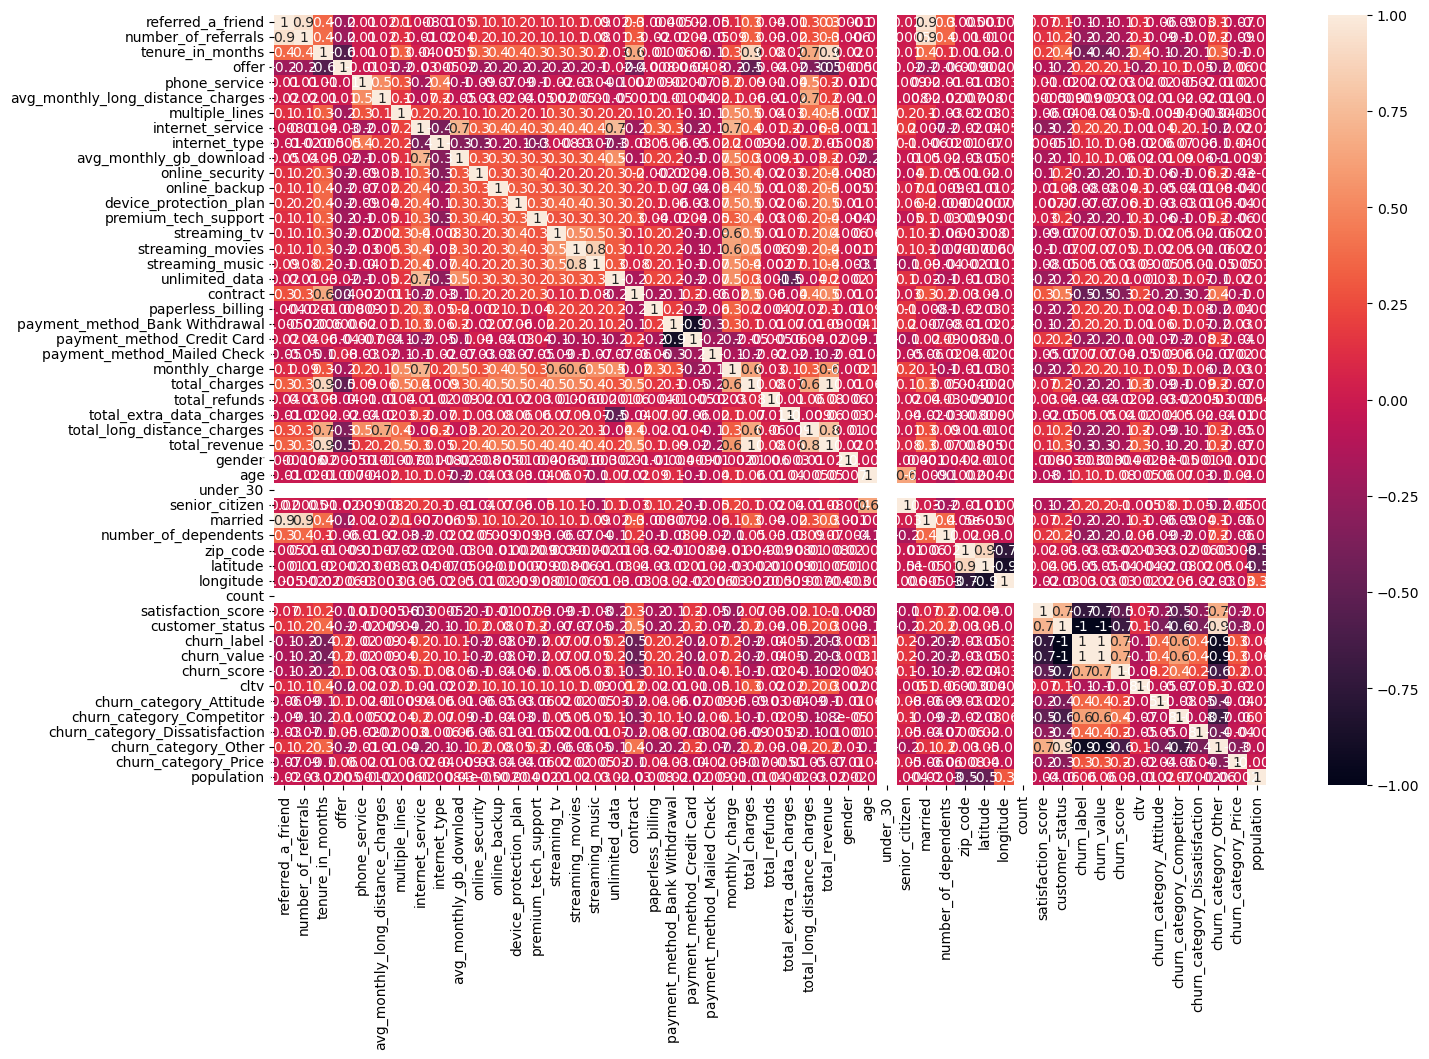

In [56]:
# calculate correlation matrix (convert to pandas for spearman correlation)
from scipy.stats import spearmanr
df_corr = df_numerical_variables.to_pandas().corr(method='spearman')

# plot the correlation matrix
plt.figure(figsize=(16,10))
sns.heatmap(df_corr, annot=True, fmt = '.1g')

In [57]:
df_corr

,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,...,churn_label,churn_value,churn_score,cltv,churn_category_Attitude,churn_category_Competitor,churn_category_Dissatisfaction,churn_category_Other,churn_category_Price,population
referred_a_friend,1.000000,0.944610,0.361075,-0.209429,0.013919,0.018017,0.132826,0.008419,-0.010344,0.051732,...,-0.146482,-0.146482,-0.099162,0.108666,-0.061401,-0.087787,-0.033810,0.140824,-0.070257,-0.018566
number_of_referrals,0.944610,1.000000,0.378058,-0.220822,0.014803,0.018455,0.123044,-0.011267,-0.018403,0.043124,...,-0.231536,-0.231536,-0.162011,0.122620,-0.090710,-0.141650,-0.065738,0.218202,-0.087013,-0.027128
tenure_in_months,0.361075,0.378058,1.000000,-0.563339,0.009820,0.011569,0.334329,0.036928,-0.005350,0.050068,...,-0.369262,-0.369262,-0.241580,0.358124,-0.137898,-0.228742,-0.139886,0.347172,-0.096441,-0.019636
offer,-0.209429,-0.220822,-0.563339,1.000000,-0.010604,0.014016,-0.190856,-0.027741,0.004928,-0.023136,...,0.195682,0.195682,0.141248,-0.206553,0.099135,0.121024,0.049894,-0.187550,0.058833,0.005337
phone_service,0.013919,0.014803,0.009820,-0.010604,1.000000,0.519711,0.283720,-0.174625,0.441643,-0.140249,...,0.015239,0.015239,0.027453,0.024760,0.021714,0.005362,-0.015710,-0.014714,0.019850,0.001470
avg_monthly_long_distance_charges,0.018017,0.018455,0.011569,0.014016,0.519711,1.000000,0.149261,-0.070738,0.216228,-0.050721,...,0.008946,0.008946,0.030483,0.020284,0.010079,0.018000,-0.020105,-0.014191,0.013636,-0.020482
multiple_lines,0.132826,0.123044,0.334329,-0.190856,0.283720,0.149261,1.000000,0.213616,0.191138,0.135218,...,0.039367,0.039367,0.046452,0.128617,-0.008771,0.042156,-0.000308,-0.037810,0.025038,-0.005566
internet_service,0.008419,-0.011267,0.036928,-0.027741,-0.174625,-0.070738,0.213616,1.000000,-0.382250,0.715899,...,0.227619,0.227619,0.149582,0.013555,0.039777,0.171639,0.097495,-0.203689,0.015234,0.023776
internet_type,-0.010344,-0.018403,-0.005350,0.004928,0.441643,0.216228,0.191138,-0.382250,1.000000,-0.318975,...,0.098058,0.098058,0.076780,-0.018042,0.060575,0.067230,0.006292,-0.100943,0.044169,-0.008133
avg_monthly_gb_download,0.051732,0.043124,0.050068,-0.023136,-0.140249,-0.050721,0.135218,0.715899,-0.318975,1.000000,...,0.108525,0.108525,0.064922,0.023384,0.011938,0.092301,0.060491,-0.102084,-0.009064,0.031820


<a class="anchor" id="1st-bullet">

# 2. Feature Engineering

### Droping variables based on correlaction, univalue variable and entire null variable

In [58]:
df = df.drop(['customer_id','under_30', 'count', 'quarter', 'lat_long',	'latitude',	'longitude', 'married', 'total_long_distance_charges', 'tenure_in_months', 'city', 'churn_reason','senior_citizen','referred_a_friend','customer_status','zip_code','churn_label'])
#ATENCAO AQUI o zip code saiu porque está como variavel numerica mas temos de usar alguma coisa para a geografia

In [59]:
df

number_of_referrals,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method_Bank Withdrawal,payment_method_Credit Card,payment_method_Mailed Check,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_revenue,gender,age,number_of_dependents,satisfaction_score,churn_value,churn_score,cltv,churn_category_Attitude,churn_category_Competitor,churn_category_Dissatisfaction,churn_category_Other,churn_category_Price,population
i64,i32,i32,f64,i32,i32,i32,f64,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,u8,u8,u8,f64,f64,f64,f64,f64,i32,i64,i64,f64,i64,i64,i64,u8,u8,u8,u8,u8,f64
0,2,0,0.0,0,1,1,1.817121,0,0,1,0,1,1,1,1,1,1,0,1,0,3.699927,12.397346,1.0,0.0,12.389729,0,56,0,4.0,0,31,5433,0,0,0,1,0,27.725637
0,2,1,3.095449,1,1,3,2.289428,0,0,0,0,1,1,1,1,1,0,1,0,0,4.573286,9.197684,0.0,0.0,10.051006,0,53,0,3.0,1,95,5335,1,0,0,0,0,38.328409
0,2,1,3.135289,1,0,3,0.0,0,0,0,0,0,0,0,0,3,0,0,1,0,2.884499,10.576315,0.0,0.0,13.859843,0,54,0,3.0,0,66,3948,0,0,0,1,0,36.599777
0,5,1,1.308427,0,1,1,2.802039,0,0,0,1,1,0,0,1,1,1,0,1,0,3.903963,7.464723,0.0,0.0,7.557367,0,54,0,3.0,1,91,4661,0,0,0,1,0,10.731806
0,2,0,0.0,0,1,1,2.843867,0,1,0,0,0,1,1,1,3,1,0,1,0,3.385405,8.448361,0.0,0.0,8.448361,0,49,0,4.0,0,55,2118,0,0,0,1,0,36.851855
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
0,2,1,3.557947,0,1,1,3.979057,0,0,1,1,0,1,1,0,1,0,0,0,1,4.002082,7.958378,0.0,1.0,9.56236,0,19,0,5.0,0,25,2804,0,0,0,1,0,7.67443
1,2,1,3.186335,0,1,3,2.620741,0,0,0,0,1,1,1,1,1,0,0,0,1,4.467252,4.467252,0.0,0.0,4.952891,1,44,0,1.5,1,68,3123,0,1,0,0,0,7.255842
1,2,1,2.565217,0,1,3,1.817121,0,1,1,0,1,1,1,1,1,0,1,0,0,4.659314,9.446234,0.0,0.0,9.925919,0,47,0,2.0,1,76,2750,0,1,0,0,0,35.852794


In [60]:
df.shape

(5634, 39)

In [61]:
df = df.drop(['churn_category_Other','churn_category_Competitor','churn_category_Dissatisfaction','churn_category_Attitude','churn_category_Price'])

Variance

In [62]:
def apply_variance(X_train, var):
  print(var + ':' + str(X_train.var()))

def select_features_variance(df):
    df_pd = df.to_pandas()
    X = df_pd.drop('churn_value', axis=1)
    y = df_pd['churn_value'].copy()
    numerical_columns = X.select_dtypes(include=[np.number]).columns
    # check which features to use using variance
    for var in numerical_columns:
        apply_variance(X[var], var)

select_features_variance(df)

number_of_referrals:6.5013532443999775
offer:1.250566748093776
phone_service:0.08995916414005861
avg_monthly_long_distance_charges:1.1025427857251449
multiple_lines:0.24369200690614828
internet_service:0.1690769333636142
internet_type:0.7161505356544198
avg_monthly_gb_download:1.6900619191363326
online_security:0.20609596789443463
online_backup:0.22679401853811282
device_protection_plan:0.22569874354060984
premium_tech_support:0.2054985451685355
streaming_tv:0.23615190821420956
streaming_movies:0.2370572431171971
streaming_music:0.22796970613041911
unlimited_data:0.22118631138163744
contract:0.7195168047513292
paperless_billing:0.24109283993272354
payment_method_Bank Withdrawal:0.2474308459562516
payment_method_Credit Card:0.23866306877022483
payment_method_Mailed Check:0.05247845040140442
monthly_charge:0.507850315048969
total_charges:24.013273206850663
total_refunds:0.06733688295700832
total_extra_data_charges:0.0964265802445526
total_revenue:27.0184018185066
gender:0.250036314857159

Decision Tree

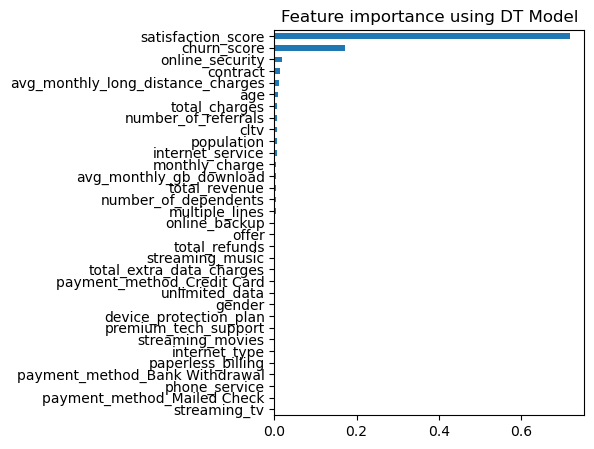

In [63]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier

def plot_importance(variables, name):
    imp_features = variables.sort_values()
    plt.figure(figsize=(4,5))
    imp_features.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

def apply_dt(X_train, y_train):
    dt = DecisionTreeClassifier(random_state = 99).fit(X_train, y_train)
    feature_importances = pd.Series(dt.feature_importances_, index = X_train.columns)
    plot_importance(feature_importances, 'DT')

def select_best_features_dt(df):
    df_pd = df.to_pandas()
    X = df_pd.drop('churn_value', axis = 1)
    y = df_pd['churn_value'].copy()
    apply_dt(X, y)



select_best_features_dt(df)

In [64]:

df_temp = df.drop(['satisfaction_score','churn_score'])

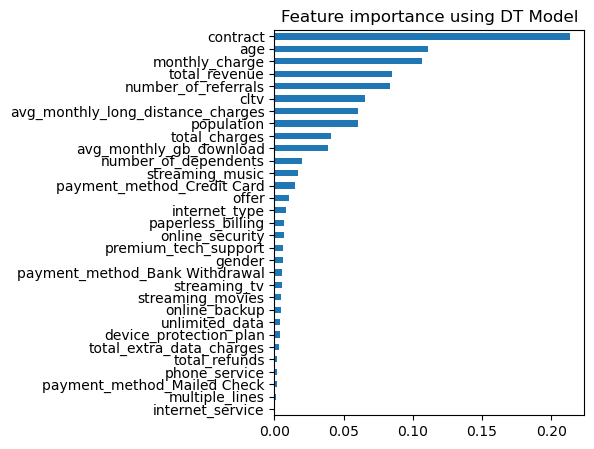

In [65]:
select_best_features_dt(df_temp)

##Title DT
number_of_referrals - YES
offer - YES
phone_service - NO
avg_monthly_long_distance_charges - YES
multiple_lines - NO
internet_service - NO
internet_type - NO
avg_monthly_gb_download - YES
online_security - NO
online_backup - NO
device_protection_plan - NO
premium_tech_support - YES
streaming_tv - NO
streaming_movies - NO
streaming_music - YES
unlimited_data - NO
contract - YES
paperless_billing - NO
payment_method_Bank Withdrawal - NO
payment_method_Credit Card - YES
payment_method_Mailed Check - NO
monthly_charge - YES
total_charges - YES
total_refunds - NO
total_extra_data_charges - NO
total_revenue - YES
gender - NO
age - YES
number_of_dependents - YES
satisfaction_score - NO
churn_value - NO
churn_score - NO
cltv - YES
population - YES

Wrapped Method

In [66]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.feature_selection import RFE 

#def apply_rfe(X_train, y_train):
#    rfe = RFE(estimator = LogisticRegression(), n_features_to_select = 5)
#    rfe.fit_transform(X = X_train, y = y_train)
#    selected_features = pd.Series(rfe.support_, index = X_train.columns)
#    print(selected_features)

#def select_best_features(X, y):
#    X_train=X
#    y_train=y
#    numerical_data = X_train.copy()
#    scaler = MinMaxScaler().fit(numerical_data)
#    X_train_scaled = scaler.transform(numerical_data)
#    X_train_scaled = pd.DataFrame(X_train_scaled, columns = numerical_data.columns)


#    print('------------------ RFE ----------------------')
#    apply_rfe(X_train, y_train)
#df_pd = df_temp.to_pandas()
#X = df_pd.drop('churn_value', axis = 1)
#y = df_pd['churn_value'].copy()

#select_best_features(X, y)


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE 

def apply_rfe(X_train, y_train):
    model = LogisticRegression(max_iter=1000)  # evita warnings de convergência
    rfe = RFE(estimator=model, n_features_to_select=8)
    rfe.fit(X_train, y_train)
    
    selected_features = pd.Series(rfe.support_, index=X_train.columns)
    print(selected_features[selected_features == True])

    return selected_features

def select_best_features(X, y):

    scaler = MinMaxScaler().fit(X)
    X_scaled = scaler.transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

    print('------------------ RFE ----------------------')
    selected = apply_rfe(X_scaled, y)

    return selected

df_pd = df_temp.to_pandas()

X = df_pd.drop('churn_value', axis=1)
y = df_pd['churn_value']

selected = select_best_features(X, y)


------------------ RFE ----------------------
number_of_referrals            True
contract                       True
payment_method_Mailed Check    True
monthly_charge                 True
total_charges                  True
total_revenue                  True
age                            True
number_of_dependents           True
dtype: bool


In [68]:
def apply_rfe(X_train, y_train):
    model = LogisticRegression(max_iter=1000)  # evita warnings de convergência
    rfe = RFE(estimator=model, n_features_to_select=10)
    rfe.fit(X_train, y_train)
    
    selected_features = pd.Series(rfe.support_, index=X_train.columns)
    print(selected_features[selected_features == True])

    return selected_features

def select_best_features(X, y):

    # Escalonar os dados
    scaler = MinMaxScaler().fit(X)
    X_scaled = scaler.transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

    print('------------------ RFE ----------------------')
    selected = apply_rfe(X_scaled, y)

    return selected

df_pd = df_temp.to_pandas()

X = df_pd.drop('churn_value', axis=1)
y = df_pd['churn_value']

selected = select_best_features(X, y)


------------------ RFE ----------------------
number_of_referrals            True
phone_service                  True
online_security                True
contract                       True
payment_method_Mailed Check    True
monthly_charge                 True
total_charges                  True
total_revenue                  True
age                            True
number_of_dependents           True
dtype: bool


In [69]:
def apply_rfe(X_train, y_train):
    model = LogisticRegression(max_iter=1000)  # evita warnings de convergência
    rfe = RFE(estimator=model, n_features_to_select=15)
    rfe.fit(X_train, y_train)
    
    selected_features = pd.Series(rfe.support_, index=X_train.columns)
    print(selected_features[selected_features == True])

    return selected_features

def select_best_features(X, y):

    # Escalonar os dados
    scaler = MinMaxScaler().fit(X)
    X_scaled = scaler.transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

    print('------------------ RFE ----------------------')
    selected = apply_rfe(X_scaled, y)

    return selected

df_pd = df_temp.to_pandas()

X = df_pd.drop('churn_value', axis=1)
y = df_pd['churn_value']

selected = select_best_features(X, y)

------------------ RFE ----------------------
number_of_referrals            True
phone_service                  True
online_security                True
premium_tech_support           True
streaming_tv                   True
contract                       True
paperless_billing              True
payment_method_Credit Card     True
payment_method_Mailed Check    True
monthly_charge                 True
total_charges                  True
total_revenue                  True
age                            True
number_of_dependents           True
population                     True
dtype: bool


In [70]:
def apply_rfe(X_train, y_train):
    model = LogisticRegression(max_iter=1000)  # evita warnings de convergência
    rfe = RFE(estimator=model, n_features_to_select=10)
    rfe.fit(X_train, y_train)
    
    selected_features = pd.Series(rfe.support_, index=X_train.columns)
    print(selected_features[selected_features == True])

    return selected_features

def select_best_features(X, y):

    scaler = MinMaxScaler().fit(X)
    X_scaled = scaler.transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

    print('------------------ RFE ----------------------')
    selected = apply_rfe(X_scaled, y)

    return selected

df_pd = df_temp.to_pandas()

X = df_pd.drop('churn_value', axis=1)
y = df_pd['churn_value']

selected = select_best_features(X, y)


------------------ RFE ----------------------
number_of_referrals            True
phone_service                  True
online_security                True
contract                       True
payment_method_Mailed Check    True
monthly_charge                 True
total_charges                  True
total_revenue                  True
age                            True
number_of_dependents           True
dtype: bool


<a class="anchor" id="1st-bullet">

3.1.5 Chisquare

In [71]:
def apply_chisquare(X, y, var, alpha=0.05):
    # Create contingency table
    dfObserved = pd.crosstab(y, X) 
    # Calculate Chi-square
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    
    # Return True if we should keep it (p-value < alpha), else False
    if p < alpha:
        print(f"{var} KEEP (p-value: {p:.4f})")
        return True
    else:
        print(f"{var} DISCARD (p-value: {p:.4f})")
        return False

def select_best_cat_features(df_pd):
    # Separate Features and Target
    X = df_pd.drop('churn_value', axis=1)
    y = df_pd['churn_value'].copy()
    
    selected_features = []
    
    # Iterate over ALL columns in X (since they are already encoded)
    for var in X.columns:
        # Optional: Skip columns that are continuous numbers (like 'TotalCharges' or 'Tenure')
        # if X[var].nunique() > 20: 
        #     continue
            
        if apply_chisquare(X[var], y, var):
            selected_features.append(var)
            
    return selected_features
    
    for var in X_train_cat:
        # If the function returns True, add to our list
        if apply_chisquare(X_train_cat[var], y, var):
            selected_features.append(var)
            
    return selected_features

# Now you can store the best features in a variable
best_features = select_best_cat_features(df_pd)
print("\nFinal Selected Features:", best_features)

number_of_referrals KEEP (p-value: 0.0000)
offer KEEP (p-value: 0.0000)
phone_service DISCARD (p-value: 0.2741)
avg_monthly_long_distance_charges DISCARD (p-value: 0.2259)
multiple_lines KEEP (p-value: 0.0035)
internet_service KEEP (p-value: 0.0000)
internet_type KEEP (p-value: 0.0000)
avg_monthly_gb_download KEEP (p-value: 0.0000)
online_security KEEP (p-value: 0.0000)
online_backup KEEP (p-value: 0.0000)
device_protection_plan KEEP (p-value: 0.0000)
premium_tech_support KEEP (p-value: 0.0000)
streaming_tv KEEP (p-value: 0.0000)
streaming_movies KEEP (p-value: 0.0000)
streaming_music KEEP (p-value: 0.0000)
unlimited_data KEEP (p-value: 0.0000)
contract KEEP (p-value: 0.0000)
paperless_billing KEEP (p-value: 0.0000)
payment_method_Bank Withdrawal KEEP (p-value: 0.0000)
payment_method_Credit Card KEEP (p-value: 0.0000)
payment_method_Mailed Check KEEP (p-value: 0.0000)
monthly_charge KEEP (p-value: 0.0000)
total_charges DISCARD (p-value: 0.6445)
total_refunds KEEP (p-value: 0.0019)
tota

Feature Selection Table
| Feature                          | Decision Tree | RFE-8 | RFE-10 | RFE-15 | Chi-Squared |
|----------------------------------|---------------|-------|--------|--------|-------------|
| number_of_referrals             | YES           | YES   | YES    | YES    | YES         |
| offer                           | YES           | NO    | NO     | NO     | YES         |
| phone_service                   | NO            | NO    | YES    | YES    | NO          |
| avg_monthly_long_distance_charges | YES         | NO    | NO     | NO     | NO          |
| multiple_lines                  | NO            | NO    | NO     | NO     | YES         |
| internet_service                | NO            | NO    | NO     | NO     | YES         |
| internet_type                   | NO            | NO    | NO     | NO     | YES         |
| avg_monthly_gb_download         | YES           | NO    | NO     | NO     | YES         |
| online_security                 | NO            | NO    | NO     | YES    | YES         |
| online_backup                   | NO            | NO    | NO     | YES    | YES         |
| device_protection_plan          | NO            | NO    | NO     | NO     | YES         |
| premium_tech_support            | YES           | NO    | NO     | YES    | YES         |
| streaming_tv                    | NO            | NO    | NO     | NO     | YES         |
| streaming_movies                | NO            | NO    | NO     | NO     | YES         |
| streaming_music                 | YES           | NO    | NO     | NO     | YES         |
| unlimited_data                  | NO            | NO    | NO     | NO     | YES         |
| contract                        | YES           | YES   | YES    | YES    | YES         |
| paperless_billing               | NO            | NO    | NO     | NO     | YES         |
| payment_method_Bank Withdrawal  | NO            | NO    | NO     | NO     | YES         |
| payment_method_Credit Card      | YES           | NO    | NO     | YES    | YES         |
| payment_method_Mailed Check     | NO            | YES   | YES    | YES    | YES         |
| monthly_charge                  | YES           | YES   | YES    | YES    | YES         |
| total_charges                   | YES           | YES   | YES    | YES    | NO          |
| total_refunds                   | NO            | YES   | YES    | YES    | YES         |
| total_extra_data_charges        | NO            | NO    | NO     | NO     | YES         |
| total_revenue                   | YES           | NO    | NO     | YES    | YES         |
| gender                          | NO            | NO    | NO     | NO     | NO          |
| age                             | YES           | YES   | YES    | YES    | YES         |
| number_of_dependents            | YES           | YES   | YES    | YES    | YES         |
| cltv                            | YES           | NO    | NO     | NO     | NO          |
| population                      | YES           | NO    | YES    | YES    | YES         |


In [72]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "8"
from imblearn.over_sampling import SMOTE


df_temp = df.to_pandas()

X = df_temp.drop("churn_value", axis=1)   
y = df_temp["churn_value"]                

smote = SMOTE(random_state=42)

X_res, y_res = smote.fit_resample(X, y)

df_balanced = pd.concat([X_res, y_res], axis=1)

df = pl.DataFrame(df_balanced)

In [73]:
df.select(
    pl.col('churn_value').value_counts(sort=True)
).unnest('churn_value')

churn_value,count
i64,u32
0,4129
1,4129


In [74]:
df

number_of_referrals,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method_Bank Withdrawal,payment_method_Credit Card,payment_method_Mailed Check,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_revenue,gender,age,number_of_dependents,satisfaction_score,churn_score,cltv,population,churn_value
i64,i32,i32,f64,i32,i32,i32,f64,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,u8,u8,u8,f64,f64,f64,f64,f64,i32,i64,i64,f64,i64,i64,f64,i64
0,2,0,0.0,0,1,1,1.817121,0,0,1,0,1,1,1,1,1,1,0,1,0,3.699927,12.397346,1.0,0.0,12.389729,0,56,0,4.0,31,5433,27.725637,0
0,2,1,3.095449,1,1,3,2.289428,0,0,0,0,1,1,1,1,1,0,1,0,0,4.573286,9.197684,0.0,0.0,10.051006,0,53,0,3.0,95,5335,38.328409,1
0,2,1,3.135289,1,0,3,0.0,0,0,0,0,0,0,0,0,3,0,0,1,0,2.884499,10.576315,0.0,0.0,13.859843,0,54,0,3.0,66,3948,36.599777,0
0,5,1,1.308427,0,1,1,2.802039,0,0,0,1,1,0,0,1,1,1,0,1,0,3.903963,7.464723,0.0,0.0,7.557367,0,54,0,3.0,91,4661,10.731806,1
0,2,0,0.0,0,1,1,2.843867,0,1,0,0,0,1,1,1,3,1,0,1,0,3.385405,8.448361,0.0,0.0,8.448361,0,49,0,4.0,55,2118,36.851855,0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
0,4,1,2.840088,0,0,2,1.666349,0,0,0,0,0,0,0,0,1,0,0,0,0,3.199155,6.038487,0.0,0.446442,7.332823,0,29,0,2.169663,79,4654,11.099533,1
0,2,1,2.34168,0,1,3,3.435552,0,0,0,0,0,0,0,0,1,0,1,0,0,4.358488,9.20897,0.0,0.618772,9.976176,0,37,0,1.5,87,5803,29.901901,1
0,2,1,3.224869,0,1,2,2.568879,0,0,1,1,0,1,1,0,2,1,0,0,0,4.210099,13.864665,0.0,0.334635,15.960797,0,46,0,2.498048,82,3820,32.872745,1


In [75]:
df.write_parquet(train_model_path, compression='snappy')